In [2009]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
 
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [2010]:
df = pd.read_csv('Data/final_data.csv')

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [2011]:
df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [2012]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:

The data is taken from transfermarkt.com, which is considered as one of the most reliable sources for football data.

#### 2. Timeliness: 

The data are taken from seasons 2021-2022 and 2022-2023

#### 3. Consistency: 

The data are available in our dataframe is consistent with the data available on the website.

#### 4. Relevance: 

In [2013]:
df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

All the columns might be relevant to the predicted value and should be taken into consideration. However we will drop the player column as it gives us the same insights as the player column.

In [2014]:
df.drop(['player'], axis=1, inplace=True)
df.head()

,team,name,position,height,age,appearance,goals,assists,yellow cards,second yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,0.000,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,0.000,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,0.000,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,0.000,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [2015]:
df.duplicated().sum()

0

There are no duplicated rows in the dataset.

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [2016]:
df.isna().sum()

team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

There are no missing data in the dataset.

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [2017]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 10754 non-null  object 
 1   name                 10754 non-null  object 
 2   position             10754 non-null  object 
 3   height               10754 non-null  float64
 4   age                  10754 non-null  float64
 5   appearance           10754 non-null  int64  
 6   goals                10754 non-null  float64
 7   assists              10754 non-null  float64
 8   yellow cards         10754 non-null  float64
 9   second yellow cards  10754 non-null  float64
 10  red cards            10754 non-null  float64
 11  goals conceded       10754 non-null  float64
 12  clean sheets         10754 non-null  float64
 13  minutes played       10754 non-null  int64  
 14  days_injured         10754 non-null  int64  
 15  games_injured        10754 non-null 

Data types are appropriate. However, the goals, assists, clean sheets, goal conceded, and cards received columns are taken as per games of 90 minutes.

We might have more insights if we convert these columns to actual values. we will use the following formula to convert these columns to actual values: goals, assists, clean sheets, goal conceded, and cards received = x * (minutes played/90). Where x is the value in the column.

We will change the columns in the data cleaning section.   

#### Next we will check for outliers in the dataset.

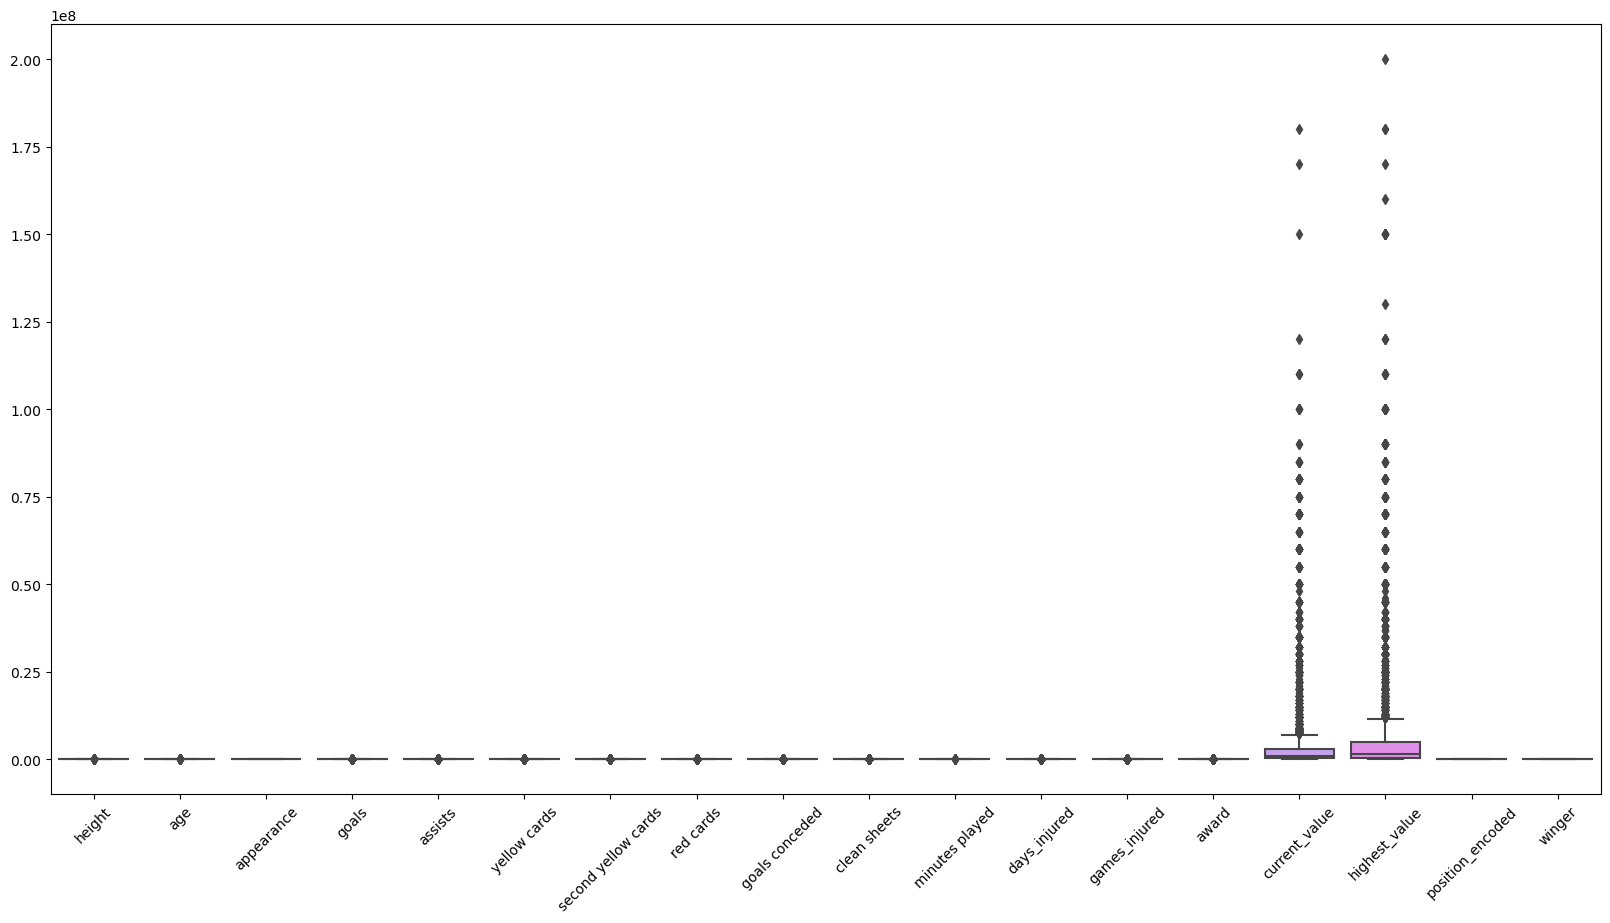

In [2018]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.show()

We can see that notable outliers are present in the current and highest value columns. We will inspect them further using histograms.

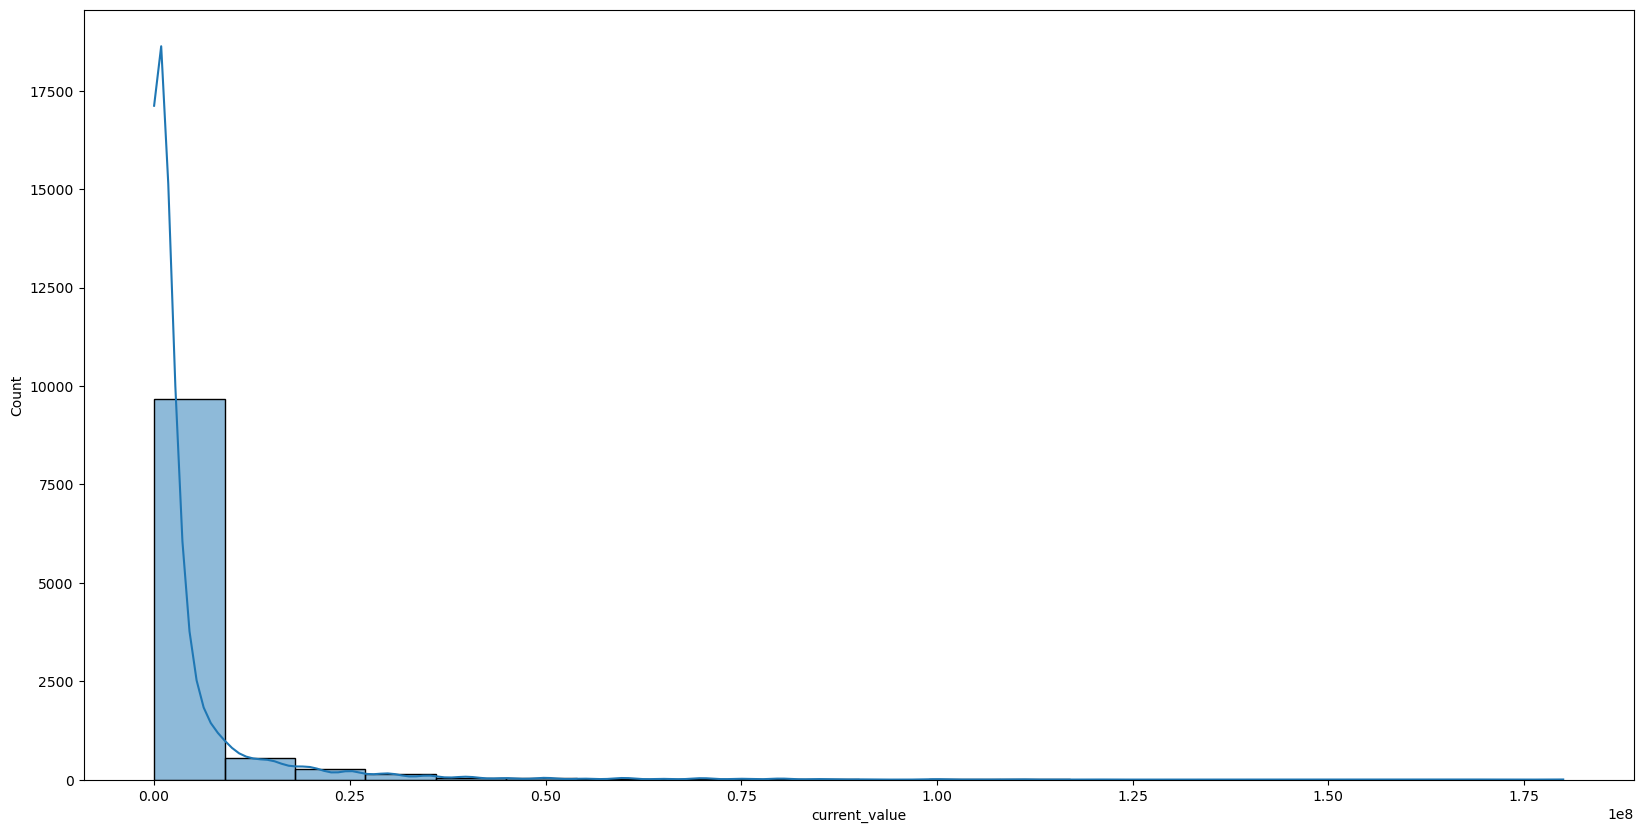

In [2019]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df['current_value'], bins=20, kde=True)
plt.show()

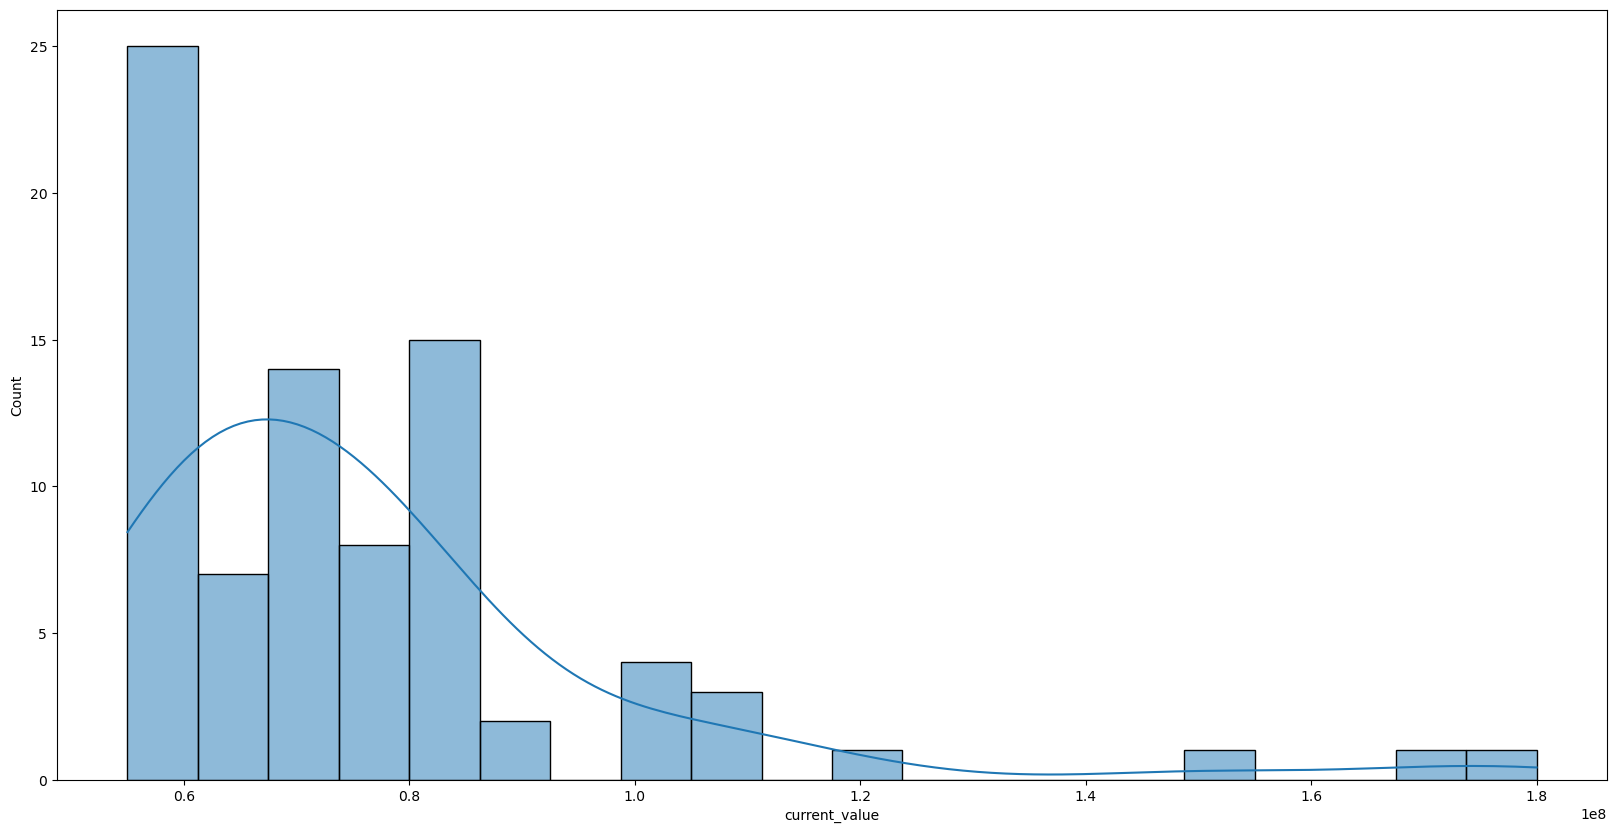

In [2020]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df[df['current_value'] > 50000000]['current_value'], bins=20, kde=True)
plt.show()

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

No missing values are present in the dataset.

### Correcting errors

-------------------

In [2021]:
temp = df[['goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards', 'second yellow cards', 'red cards', 'minutes played']].copy()
temp.iloc[:, :-1] = temp.iloc[:, :-1].apply(lambda x: x * (temp['minutes played'] / 90))
temp.head()

,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,0.000,0.000,35.000,127.000,1.000,0.000,0.000,9390
1,0.000,0.000,3.000,18.000,1.000,0.000,0.000,1304
2,0.000,0.000,3.000,2.000,0.000,0.000,0.000,292
3,2.000,4.000,0.000,0.000,16.000,0.000,0.000,6408
4,1.000,1.000,0.000,0.000,3.000,0.000,0.000,5031


In [2022]:
# We will change the columns names in the original dataframe to goals_per_90, assists_per_90, clean_sheets_per_90, goals_conceded_per_90, yellow_cards_per_90, second_yellow_cards_per_90, red_cards_per_90, minutes_played_per_90
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df.rename(columns={
    'goals': 'goals_per_90',
    'assists': 'assists_per_90',
    'clean sheets': 'clean_sheets_per_90',
    'goals conceded': 'goals_conceded_per_90',
    'yellow cards': 'yellow_cards_per_90',
    'second yellow cards': 'second_yellow_cards_per_90',
    'red cards': 'red_cards_per_90',
    'minutes played': 'minutes_played_per_90'
}, inplace=True)
df.head()


,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,second_yellow_cards_per_90,...,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,0.000,...,1.217,0.335,9390,42,5,13,15000000,70000000,1,0
1,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,0.000,...,1.242,0.207,1304,510,58,1,1500000,22000000,1,0
2,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,0.000,...,0.616,0.925,292,697,84,4,600000,6000000,1,0
3,Manchester United,Lisandro Martínez,Defender Centre-Back,175.000,25.000,82,0.028,0.056,0.225,0.000,...,0.000,0.000,6408,175,22,9,50000000,50000000,2,0
4,Manchester United,Raphaël Varane,Defender Centre-Back,191.000,30.000,63,0.018,0.018,0.054,0.000,...,0.000,0.000,5031,238,51,21,40000000,80000000,2,0


In [2023]:
df = pd.concat([df, temp], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   team                        10754 non-null  object 
 1   name                        10754 non-null  object 
 2   position                    10754 non-null  object 
 3   height                      10754 non-null  float64
 4   age                         10754 non-null  float64
 5   appearance                  10754 non-null  int64  
 6   goals_per_90                10754 non-null  float64
 7   assists_per_90              10754 non-null  float64
 8   yellow_cards_per_90         10754 non-null  float64
 9   second_yellow_cards_per_90  10754 non-null  float64
 10  red_cards_per_90            10754 non-null  float64
 11  goals_conceded_per_90       10754 non-null  float64
 12  clean_sheets_per_90         10754 non-null  float64
 13  minutes_played_per_90       107

### Dealing with outliers:

In general the value of a player is calculated differently by different positions. So we will check the outliers for each position separately.

In [2024]:
df2 = df.copy()
df2['position'] = df2['position'].apply(lambda x: x.split('-')[0]).apply(lambda x: x.split(' ')[0])
df2['position'].unique()

array(['Goalkeeper', 'Defender', 'midfield', 'Attack'], dtype=object)

In [2025]:
df['position'].unique()

array(['Goalkeeper', 'Defender Centre-Back', 'Defender Left-Back',
       'Defender Right-Back', 'midfield-DefensiveMidfield',
       'midfield-CentralMidfield', 'midfield-AttackingMidfield',
       'Attack-LeftWinger', 'Attack-RightWinger', 'Attack Centre-Forward',
       'midfield-RightMidfield', 'midfield-LeftMidfield',
       'Attack-SecondStriker', 'midfield', 'Attack', 'Defender'],
      dtype=object)

In [2026]:
# Now we will create 4 data frames according to the positions above
df_gk = df2[df2['position'] == 'Goalkeeper']
df_def = df2[df2['position'] == 'Defender']
df_mid = df2[df2['position'] == 'midfield']
df_fwd = df2[df2['position'] == 'Attack']

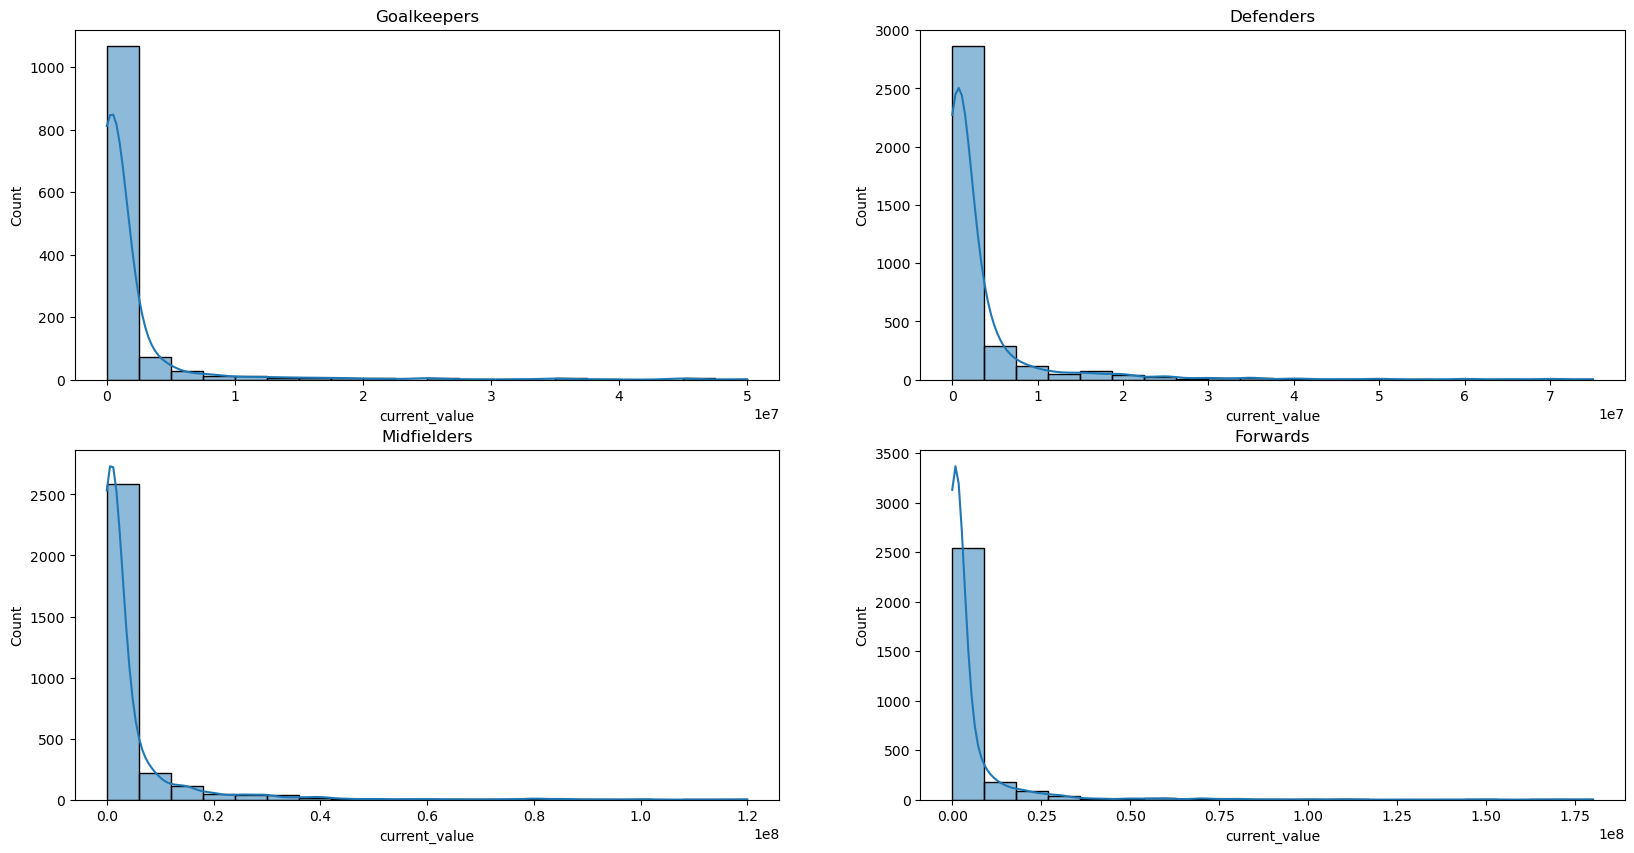

In [2027]:
# Now we will check the distribution of the current value for each position
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=df_gk['current_value'], bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Goalkeepers')
sns.histplot(data=df_def['current_value'], bins=20, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Defenders')
sns.histplot(data=df_mid['current_value'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Midfielders')
sns.histplot(data=df_fwd['current_value'], bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Forwards')
plt.show()

In [2028]:
# To handle outliers, we will split the data into 2 dataframes, one with the outliers and one without
df_outliers = df2[(np.abs(zscore(df2['current_value'])) > 3)]
df_no_outliers = df2[(np.abs(zscore(df2['current_value'])) <= 3)]

df_outliers.shape, df_no_outliers.shape

((203, 29), (10551, 29))

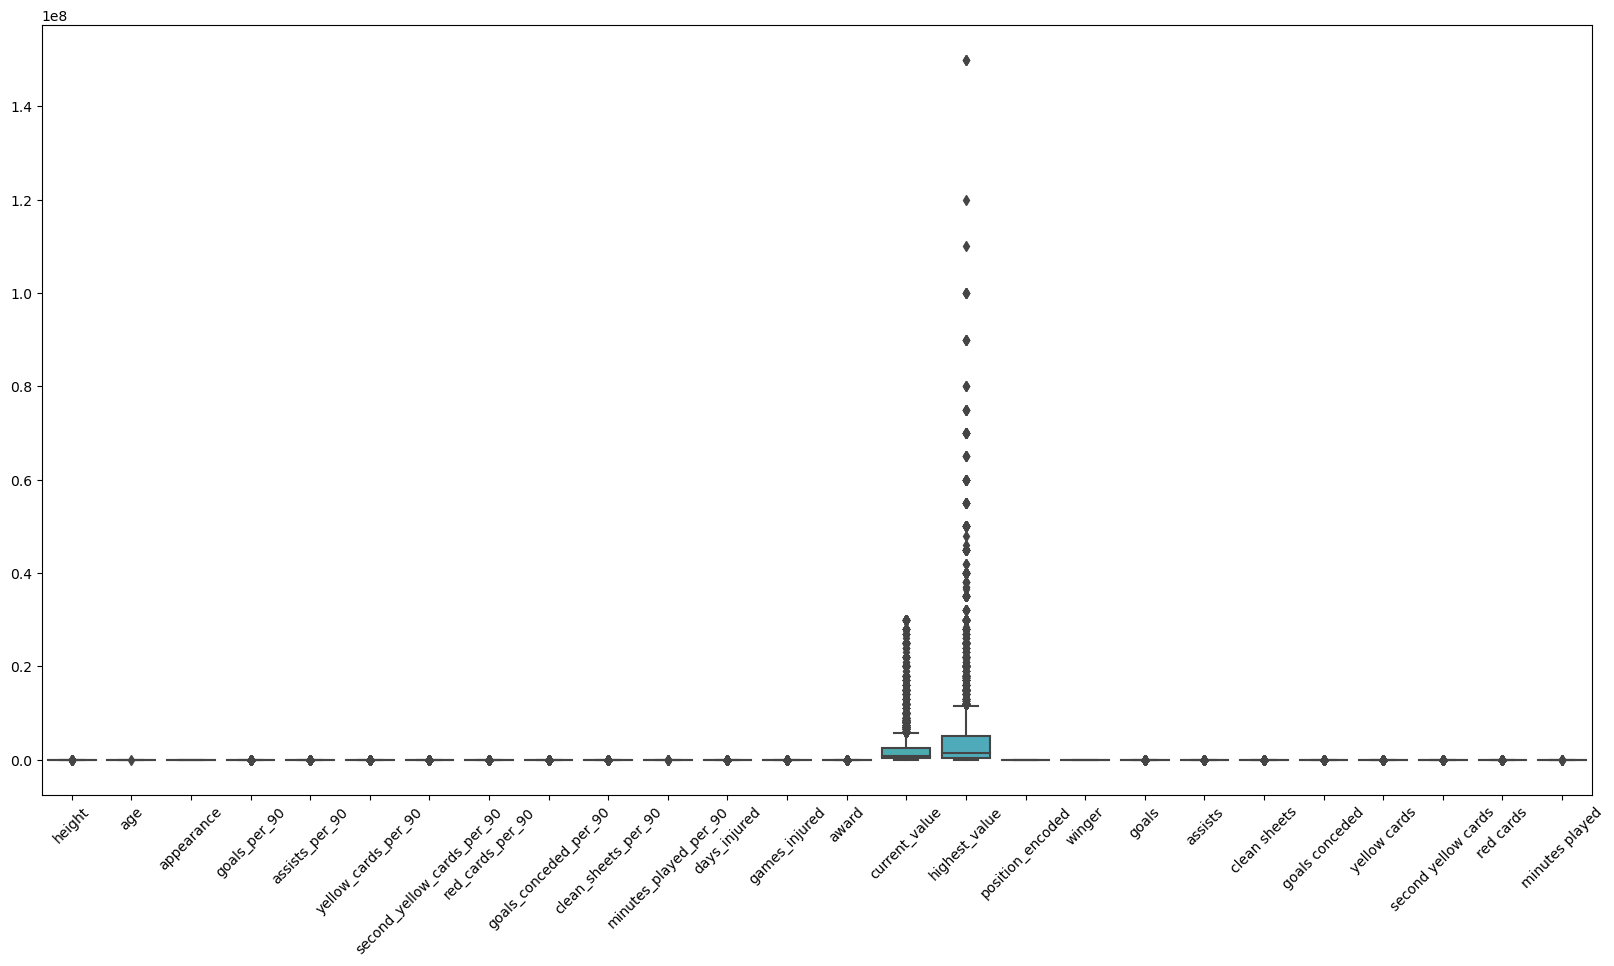

In [2029]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers)
plt.xticks(rotation=45)
plt.show()

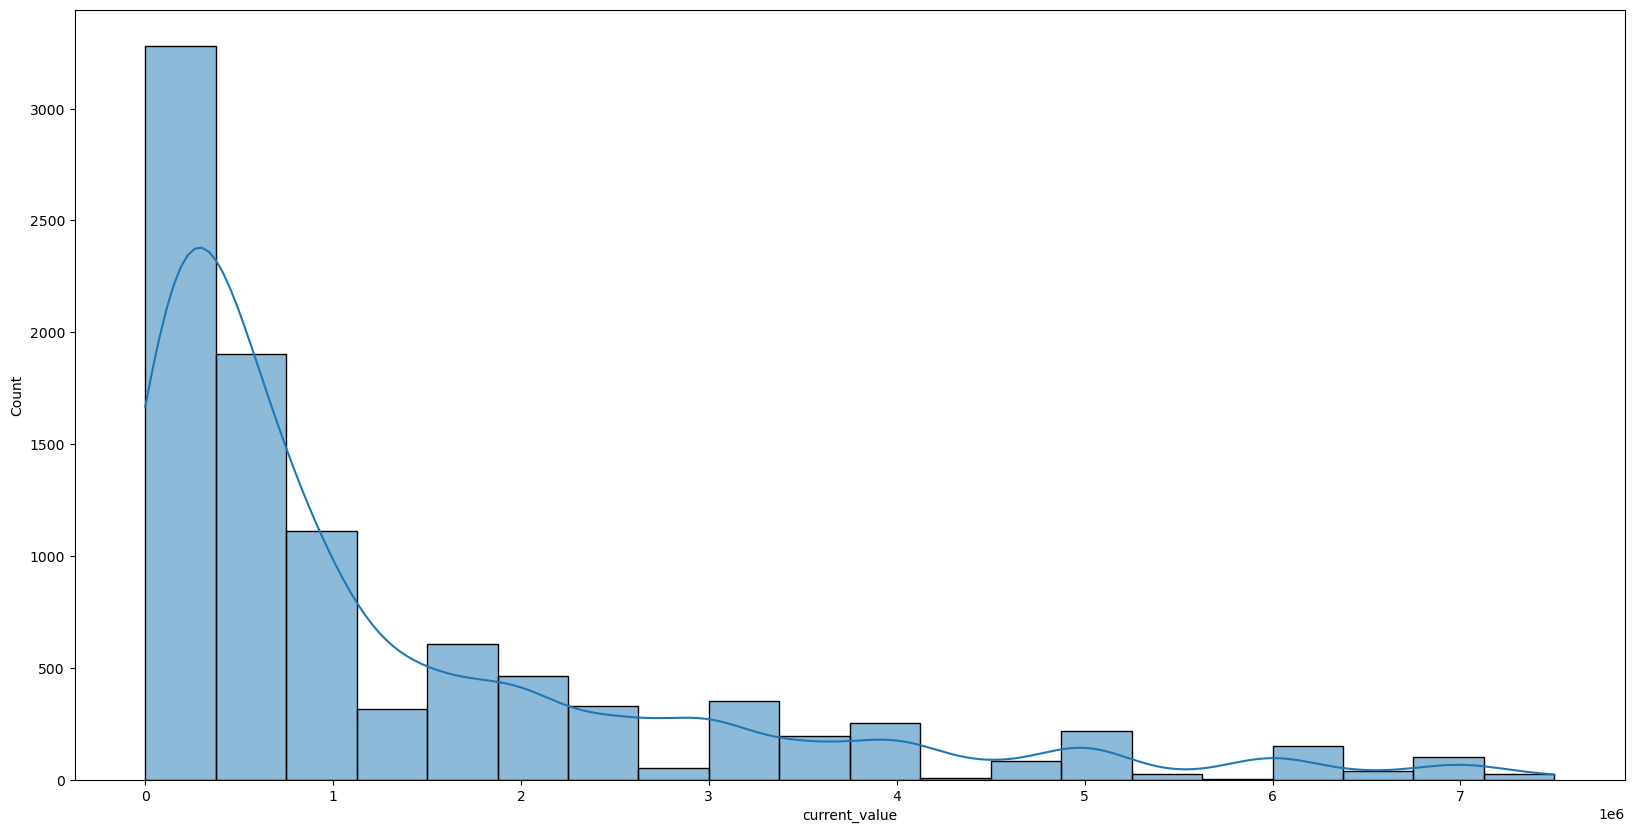

In [2030]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_no_outliers[df_no_outliers['current_value'] < 8000000]['current_value'], bins=20, kde=True)
plt.show()

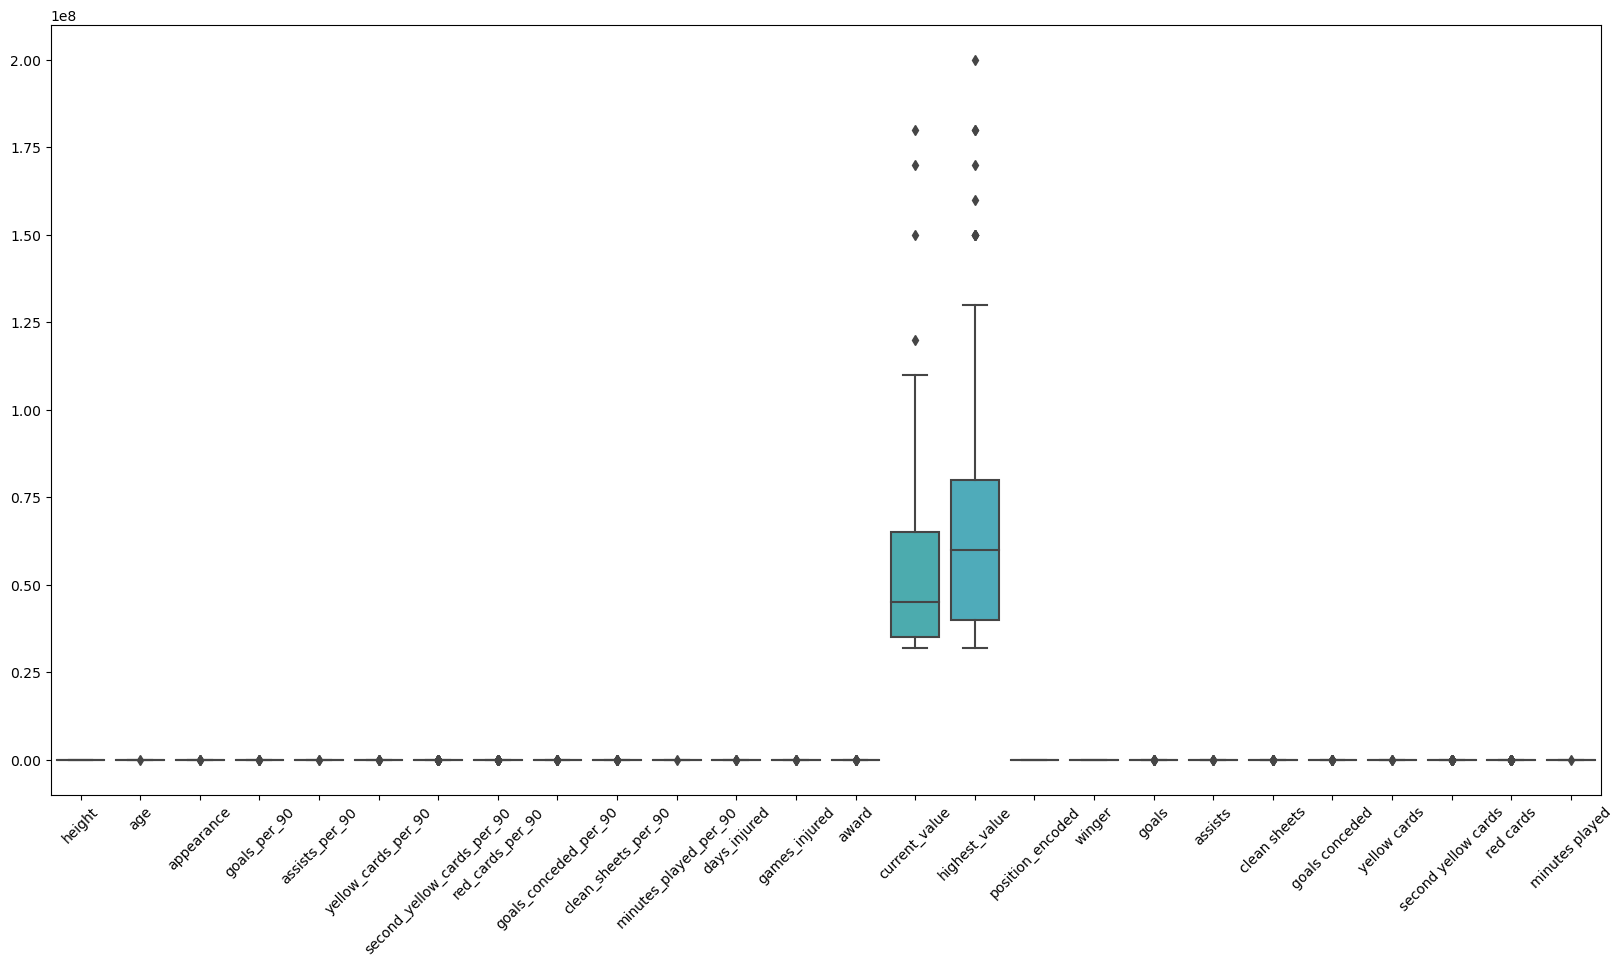

In [2031]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_outliers)
plt.xticks(rotation=45)
plt.show()

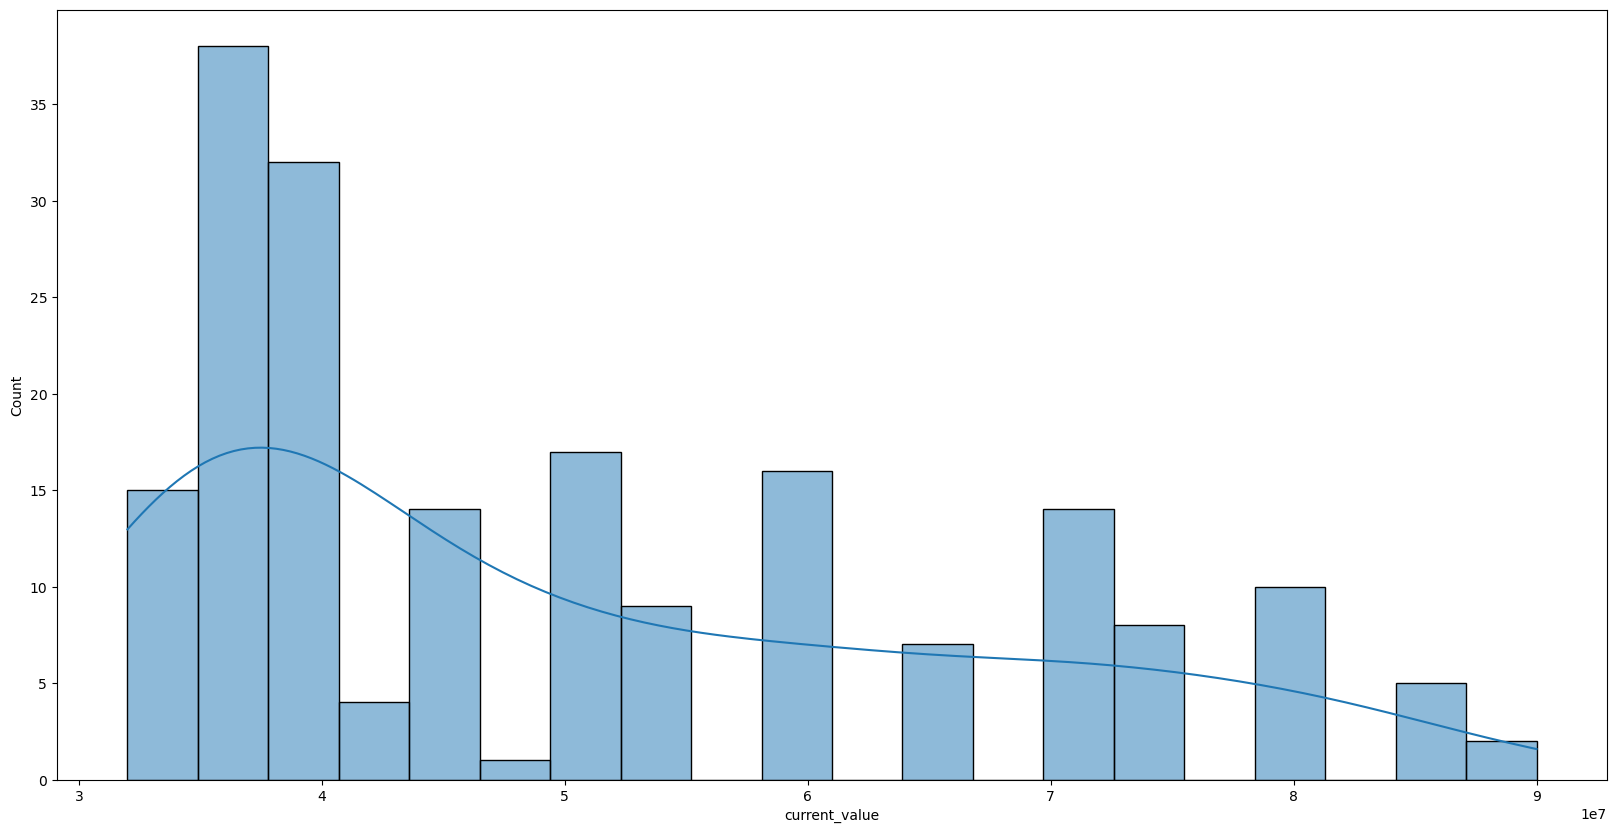

In [2032]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df_outliers[df_outliers['current_value'] < 100000000]['current_value'], bins=20, kde=True)
plt.show()

We will clean the outliers for the positions dataframes too.

In [2033]:
df_gk_filtered = df_gk[(np.abs(zscore(df_gk['current_value'])) <= 3)]
df_def_filtered = df_def[(np.abs(zscore(df_def['current_value'])) <= 3)]
df_mid_filtered = df_mid[(np.abs(zscore(df_mid['current_value'])) <= 3)]
df_fwd_filtered = df_fwd[(np.abs(zscore(df_fwd['current_value'])) <= 3)]

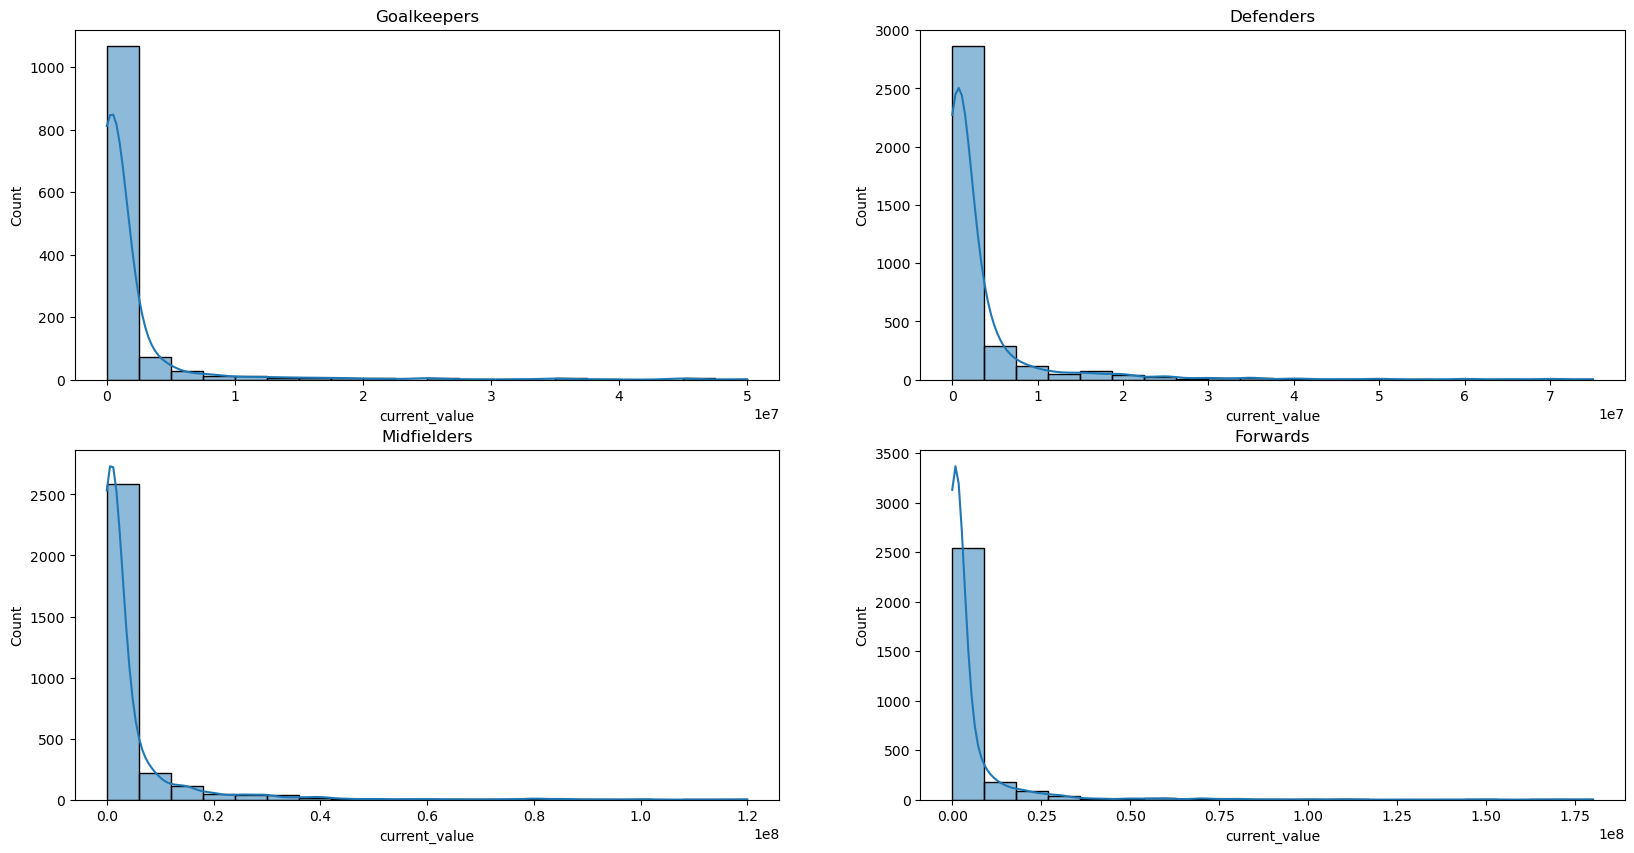

In [2034]:
# Now we will check the distribution of the current value for each position after filtering the outliers
fig, ax = plt.subplots(2, 2, figsize=(20, 10))
sns.histplot(data=df_gk['current_value'], bins=20, kde=True, ax=ax[0, 0])
ax[0, 0].set_title('Goalkeepers')
sns.histplot(data=df_def['current_value'], bins=20, kde=True, ax=ax[0, 1])
ax[0, 1].set_title('Defenders')
sns.histplot(data=df_mid['current_value'], bins=20, kde=True, ax=ax[1, 0])
ax[1, 0].set_title('Midfielders')
sns.histplot(data=df_fwd['current_value'], bins=20, kde=True, ax=ax[1, 1])
ax[1, 1].set_title('Forwards')
plt.show()

## 3. Univariate Analysis: 


### 1. Univariate Graphical Analysis:


#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

We will plot a bar chart to check the distribution of the positions in the dataset


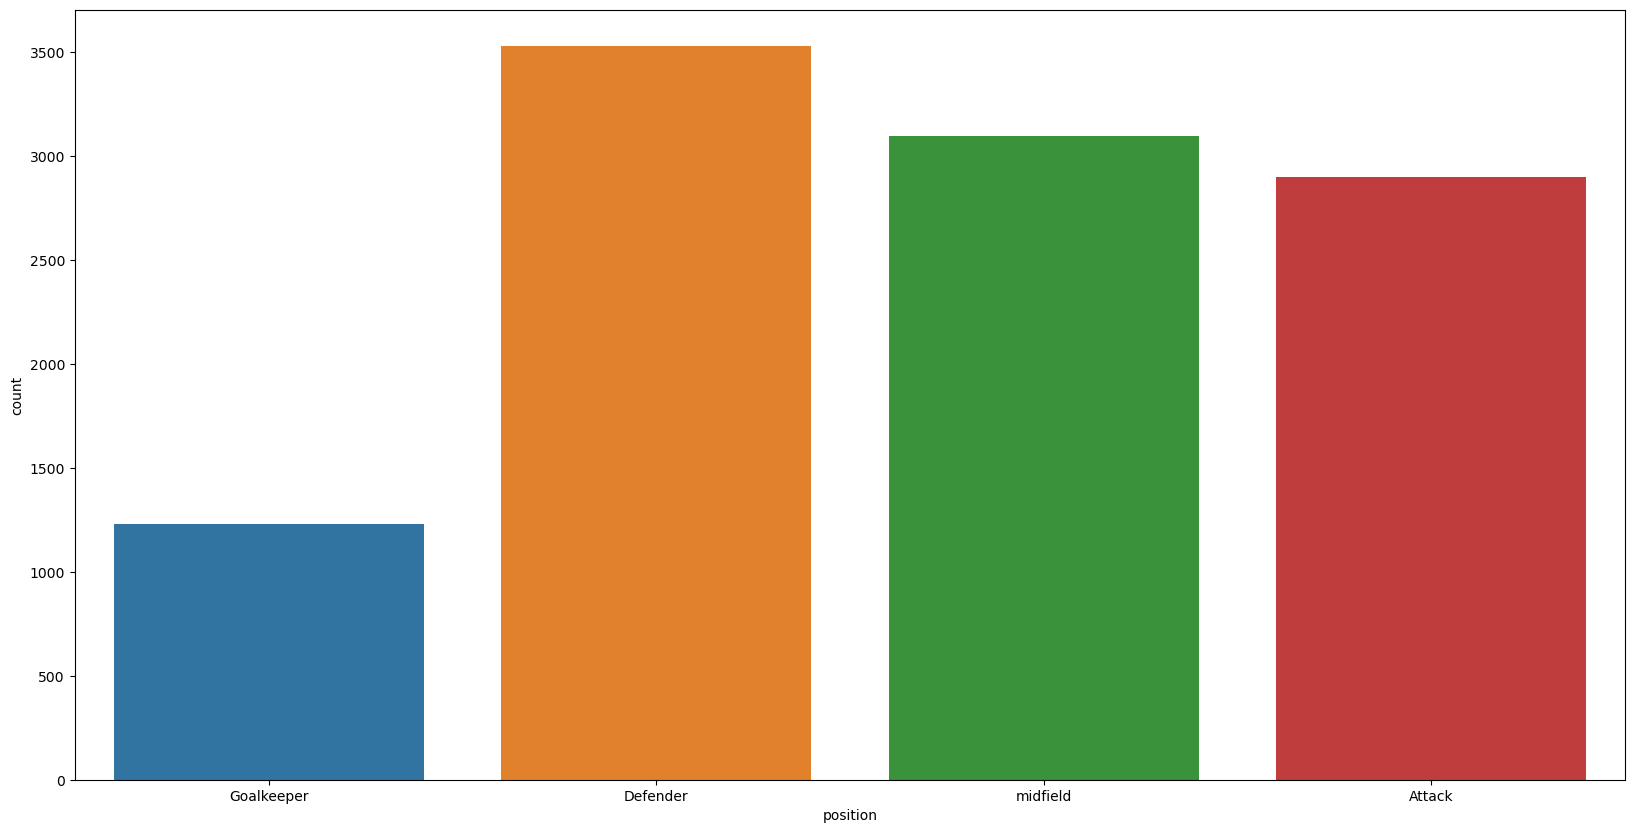

In [2035]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df2, x='position')
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

In addition to the plots we made in the check accuracy section, we will plot a histogram for the appearances column to check the distribution of the appearances in the dataset.

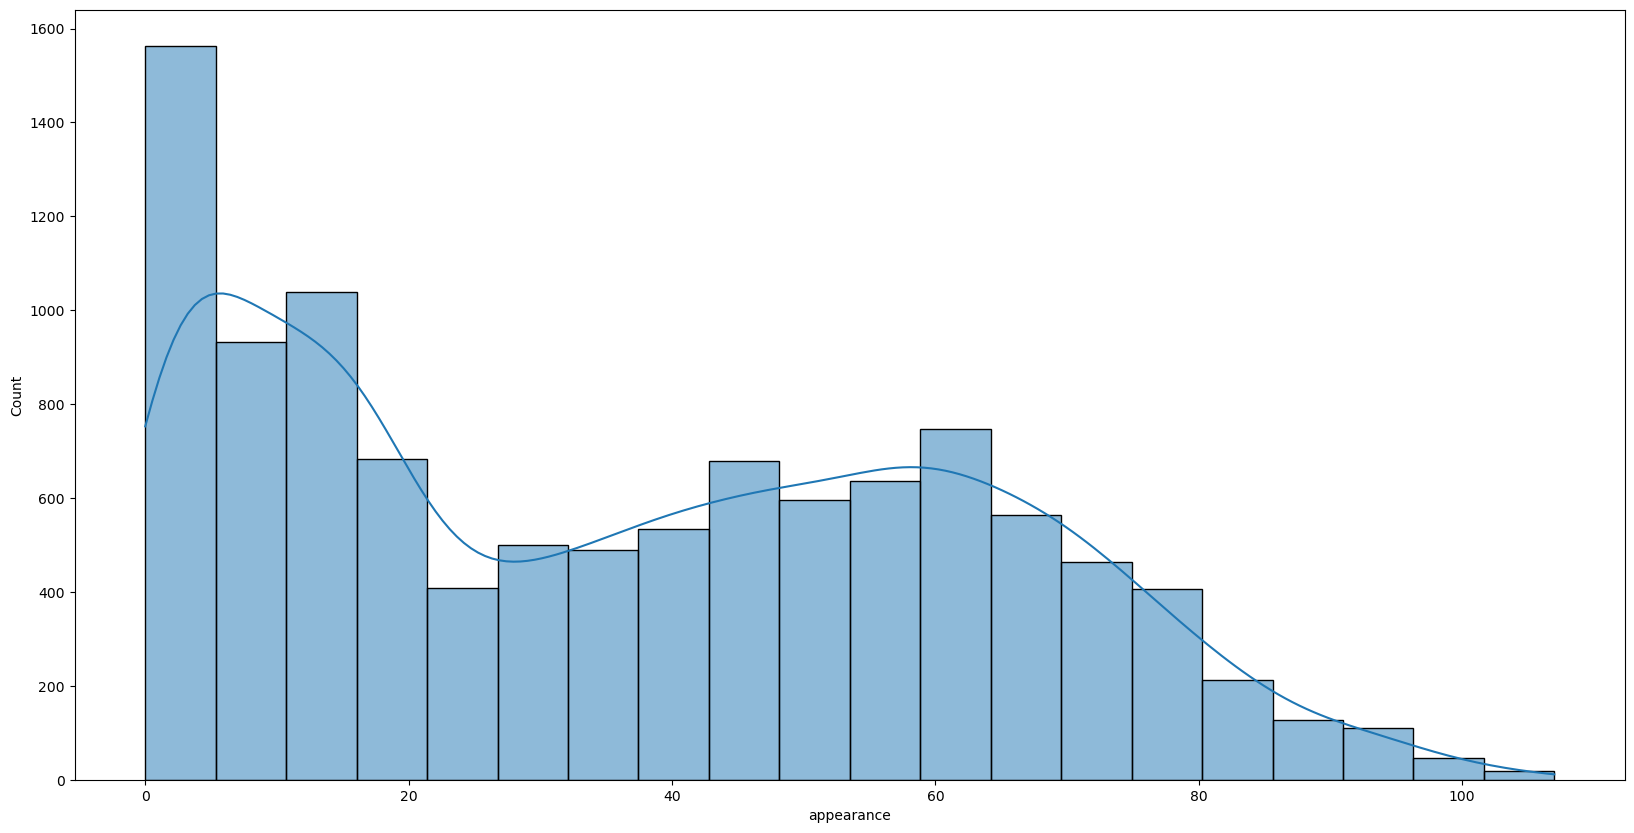

In [2036]:
plt.figure(figsize=(20, 10))
sns.histplot(data=df, x='appearance', bins=20, kde=True)
plt.show()

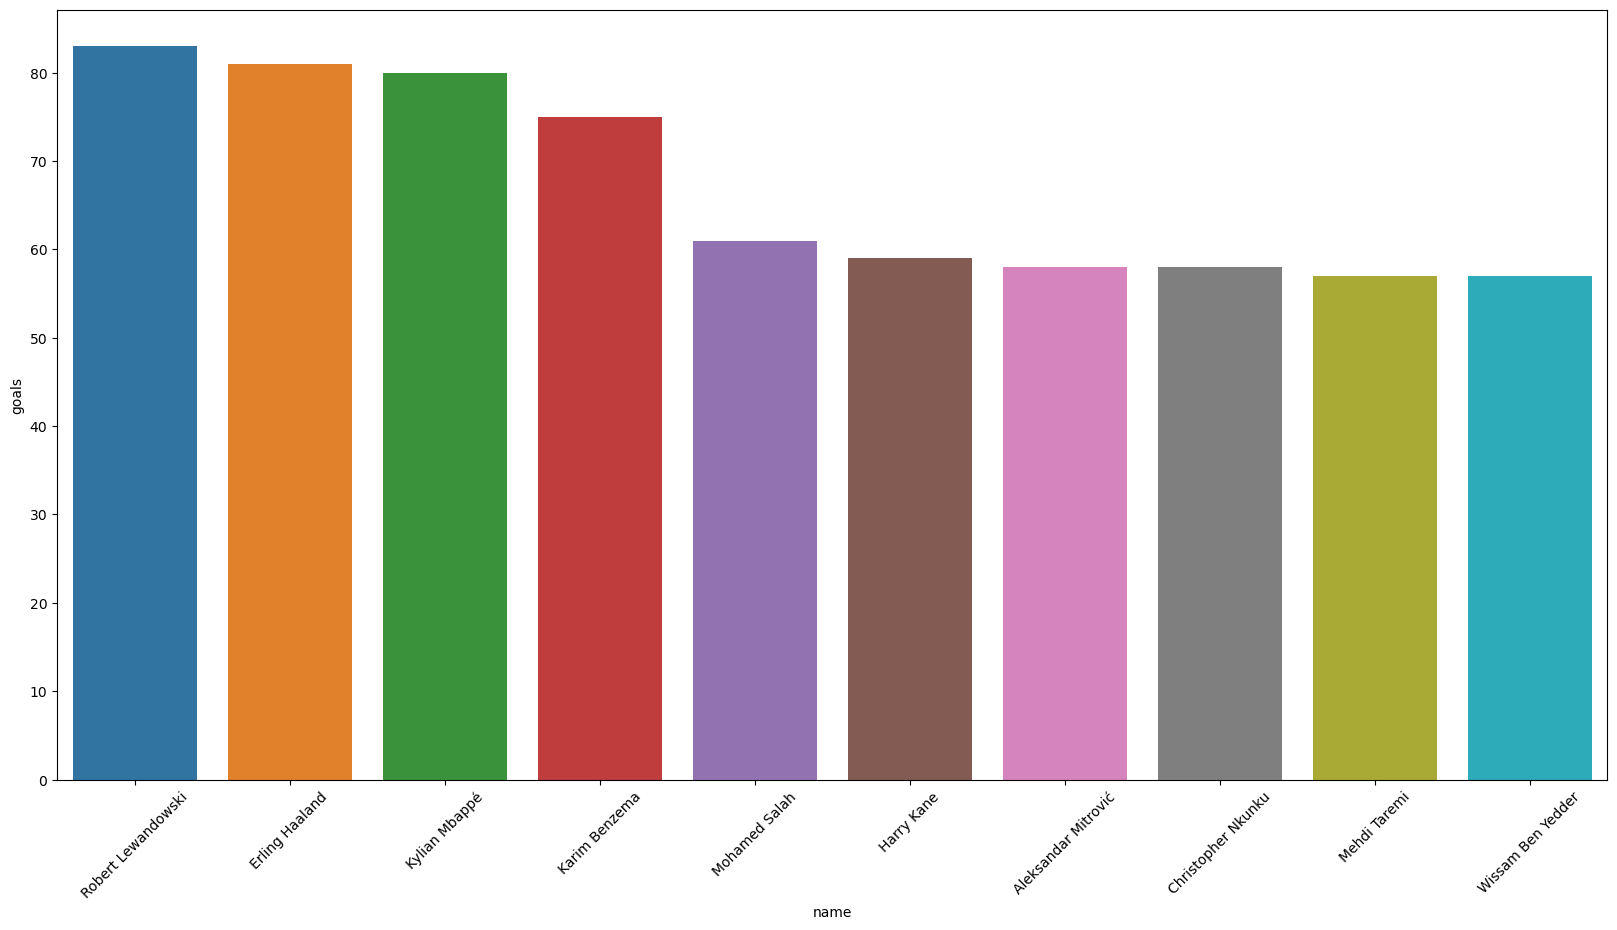

In [2037]:
top_10_goals = df2.sort_values(by='goals', ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_goals, x='name', y='goals')
plt.xticks(rotation=45)
plt.show()

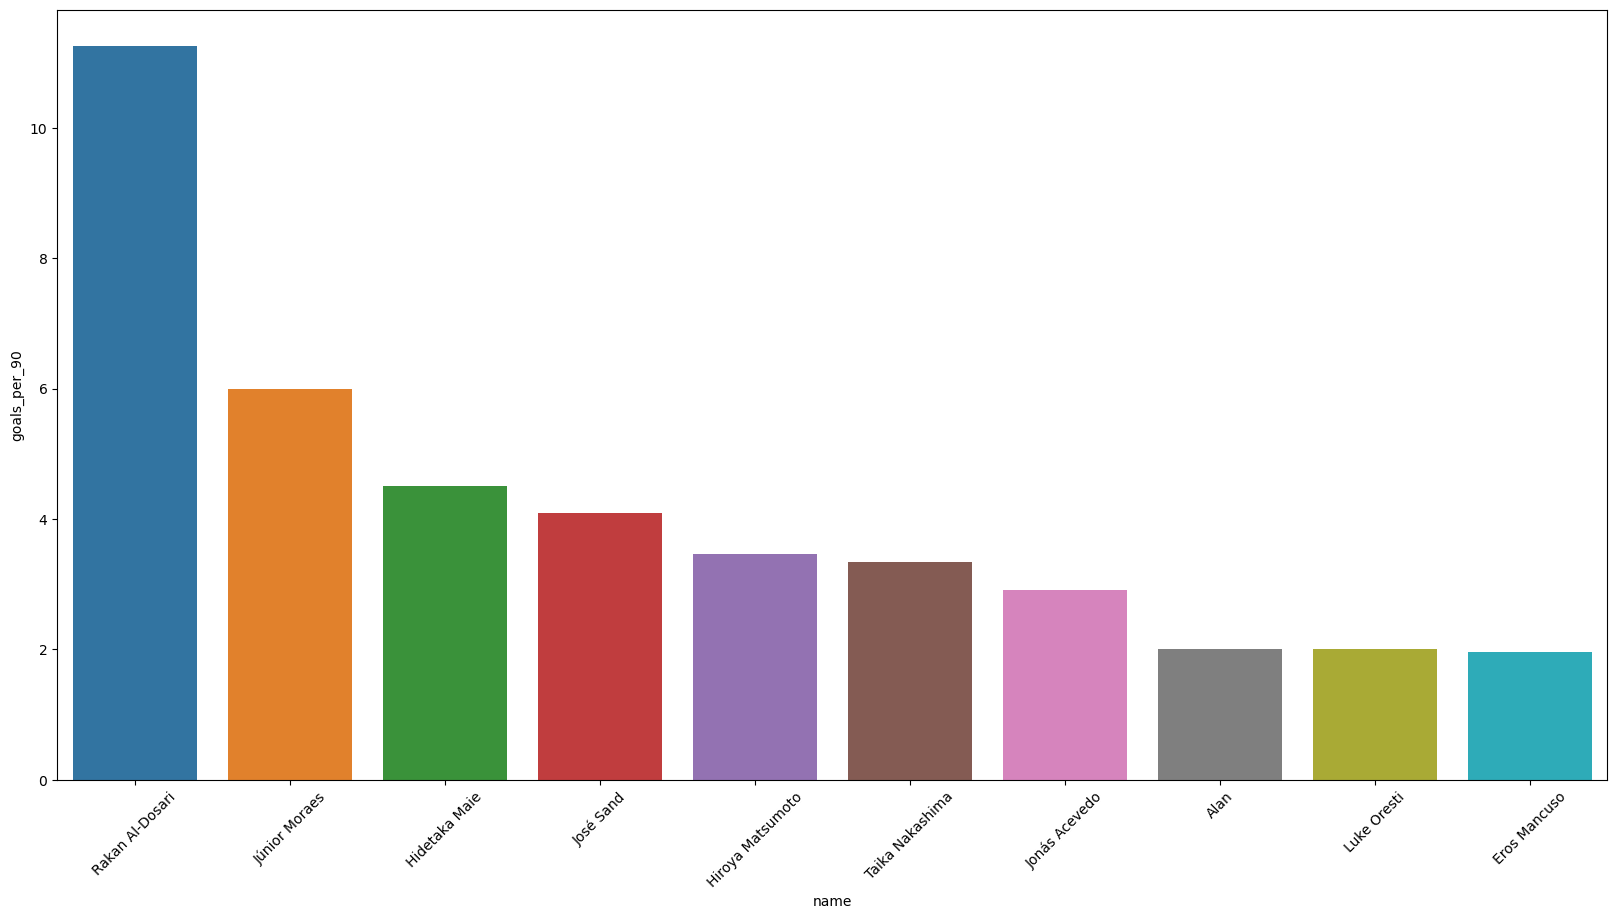

In [2038]:
top_10_goals = df2.sort_values(by='goals_per_90', ascending=False).head(10)
plt.figure(figsize=(20, 10))
sns.barplot(data=top_10_goals, x='name', y='goals_per_90')
plt.xticks(rotation=45)
plt.show()

We can see the the number of goals and goals per 90 is different.

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [2039]:
df.iloc[:, 0:14].describe()

,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,second_yellow_cards_per_90,red_cards_per_90,goals_conceded_per_90,clean_sheets_per_90,minutes_played_per_90
count,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000
mean,181.240,26.042,36.407,0.126,0.087,0.190,0.005,0.007,0.132,0.045,2470.789
std,6.970,4.778,26.527,0.236,0.143,0.432,0.025,0.081,0.442,0.924,2021.703
min,156.000,15.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,176.000,22.000,12.000,0.000,0.000,0.053,0.000,0.000,0.000,0.000,660.000
50%,181.240,26.000,35.000,0.046,0.041,0.150,0.000,0.000,0.000,0.000,2101.500
75%,186.000,29.000,59.000,0.172,0.133,0.248,0.000,0.000,0.000,0.000,3968.000
max,206.000,43.000,107.000,11.250,4.000,30.000,1.000,6.923,9.000,90.000,9510.000


In [2040]:
df.iloc[:, 14:].describe()

,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
count,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000,10754.000
mean,117.962,15.826,1.961,3622970.988,6152606.007,2.713,0.308,3.716,2.649,0.813,3.572,4.824,0.122,0.143,2470.789
std,175.207,23.384,3.744,9095409.878,13389876.391,0.986,0.461,6.576,4.138,3.598,14.683,4.955,0.371,0.408,2021.703
min,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,300000.000,450000.000,2.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,660.000
50%,37.000,5.000,1.000,800000.000,1500000.000,3.000,0.000,1.000,1.000,0.000,0.000,3.000,0.000,0.000,2101.500
75%,181.000,24.000,2.000,3000000.000,5000000.000,4.000,1.000,4.000,4.000,0.000,0.000,8.000,0.000,0.000,3968.000
max,2349.000,339.000,92.000,180000000.000,200000000.000,4.000,1.000,83.000,45.000,46.000,155.000,35.000,4.000,4.000,9510.000


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & numerical --> (scatter plot, histogram, box plot)**

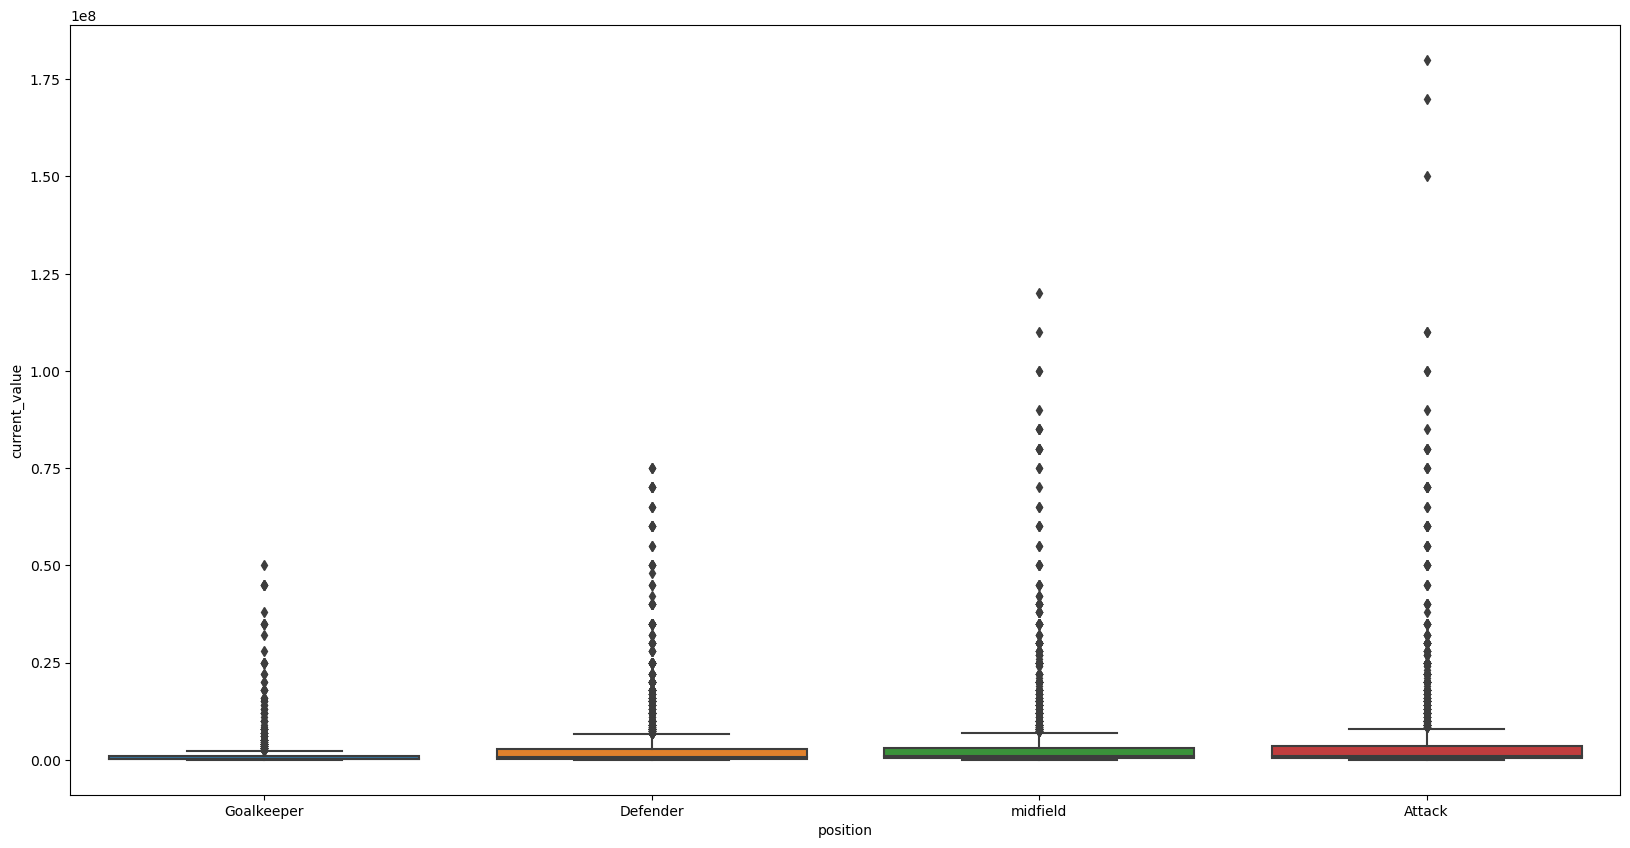

In [2041]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df2, x='position', y='current_value')
plt.show()

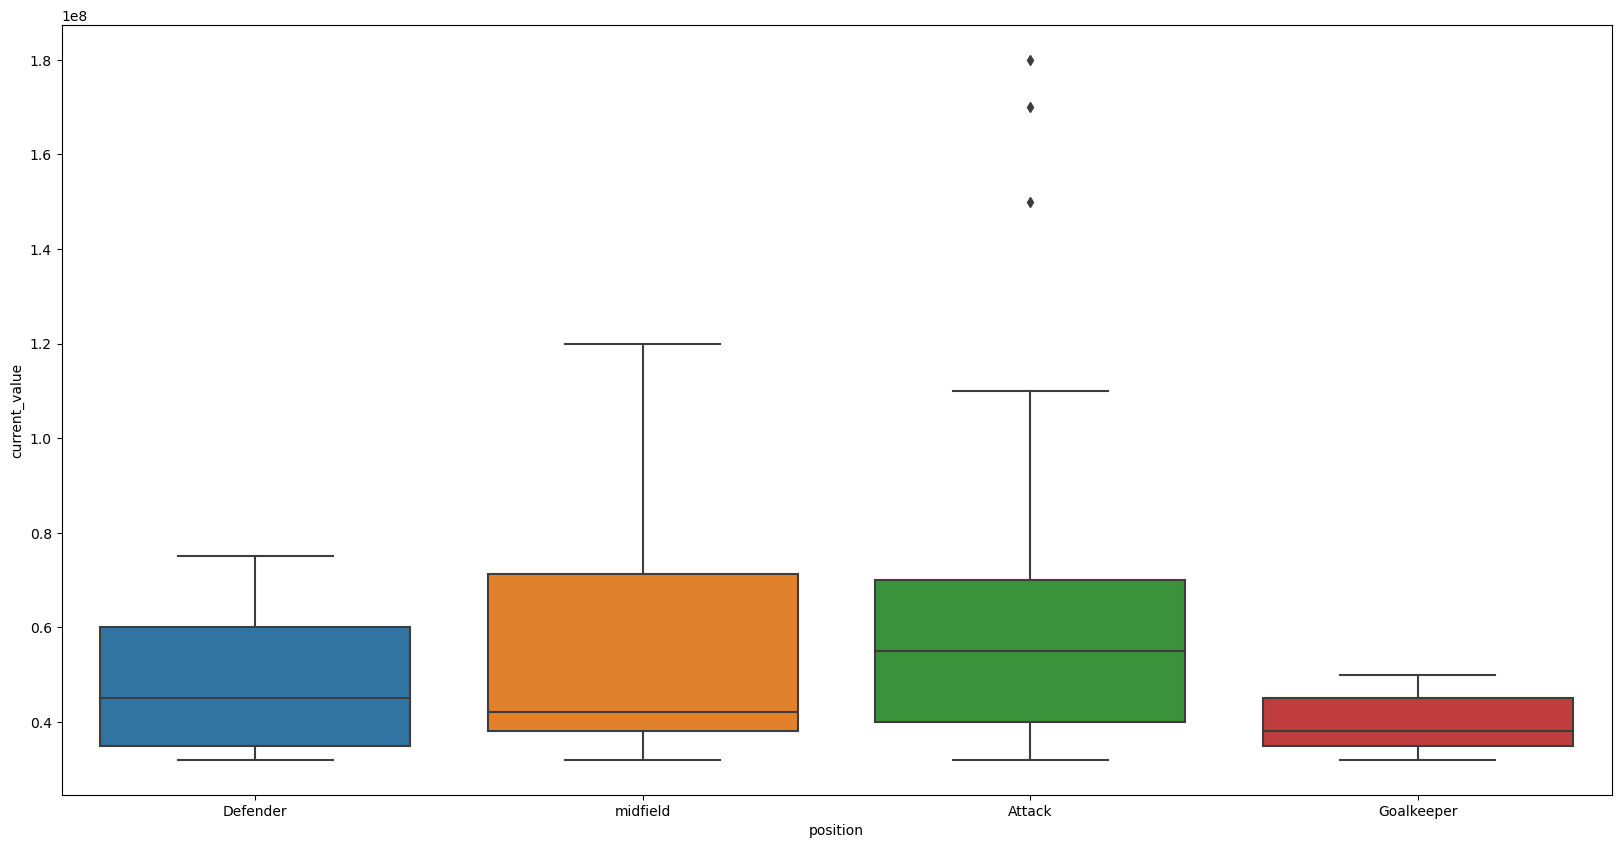

In [2042]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_outliers, x='position', y='current_value')
plt.show()

We can see that the outliers df divided by the position showing a balanced distribution. 

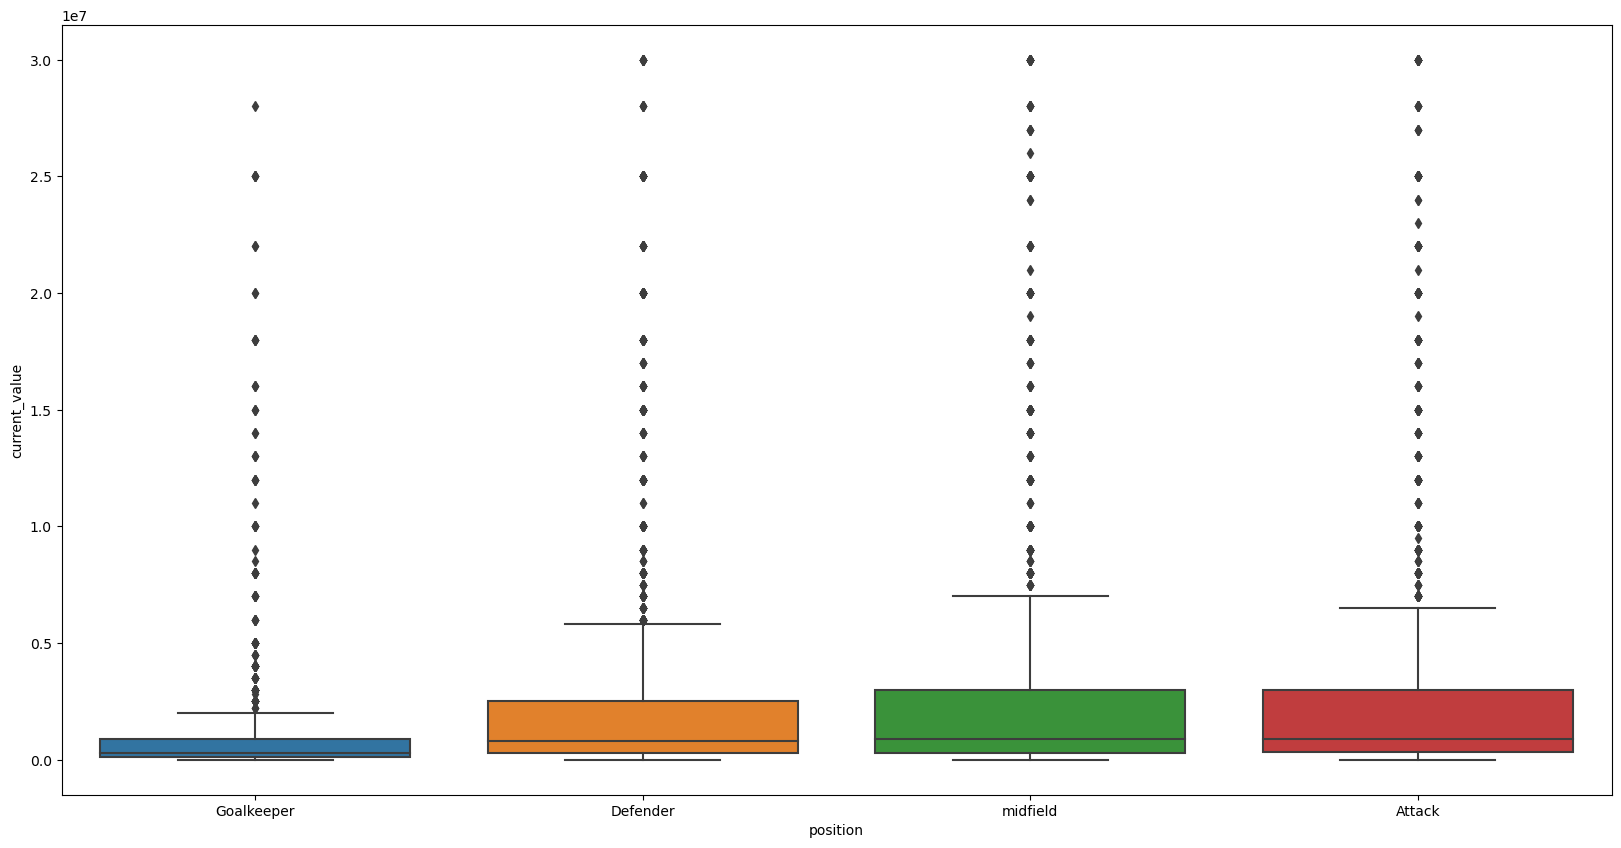

In [2043]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_no_outliers, x='position', y='current_value')
plt.show()

We can see that after removing the outliers, the distribution of the data is still not balanced. However for now we will move on with it.

In [2044]:
df_corr = df2.copy()
current_value = df_corr.pop('current_value')
df_corr.insert(0, 'current_value', current_value)
df_corr.head()

,current_value,team,name,position,height,age,appearance,goals_per_90,assists_per_90,yellow_cards_per_90,...,position_encoded,winger,goals,assists,clean sheets,goals conceded,yellow cards,second yellow cards,red cards,minutes played
0,15000000,Manchester United,David de Gea,Goalkeeper,189.000,32.000,104,0.000,0.000,0.010,...,1,0,0.000,0.000,35.000,127.000,1.000,0.000,0.000,9390
1,1500000,Manchester United,Jack Butland,Goalkeeper,196.000,30.000,15,0.000,0.000,0.069,...,1,0,0.000,0.000,3.000,18.000,1.000,0.000,0.000,1304
2,600000,Manchester United,Tom Heaton,Goalkeeper,188.000,37.000,4,0.000,0.000,0.000,...,1,0,0.000,0.000,3.000,2.000,0.000,0.000,0.000,292
3,50000000,Manchester United,Lisandro Martínez,Defender,175.000,25.000,82,0.028,0.056,0.225,...,2,0,2.000,4.000,0.000,0.000,16.000,0.000,0.000,6408
4,40000000,Manchester United,Raphaël Varane,Defender,191.000,30.000,63,0.018,0.018,0.054,...,2,0,1.000,1.000,0.000,0.000,3.000,0.000,0.000,5031


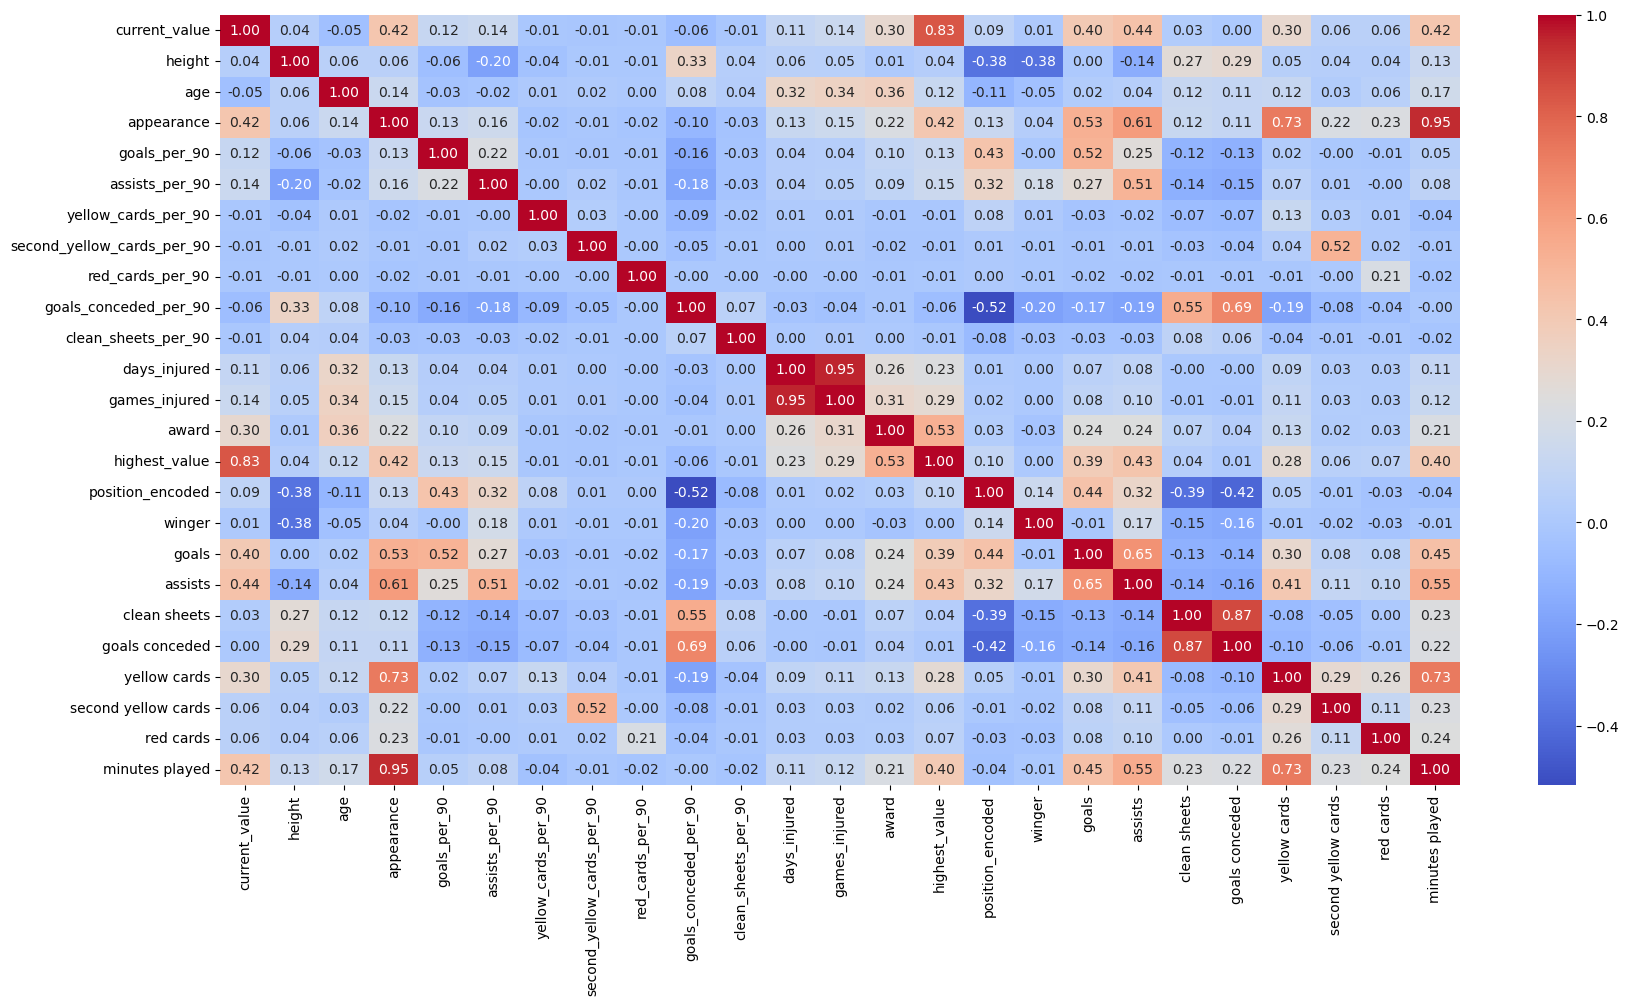

In [2045]:
# We will drop 'minutes_played_per_90' because it is highly correlated with 'minutes_played'
corr_matrix = df_corr.drop(['minutes_played_per_90'], axis=1).corr() 
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

Now we will create the correlation matrix for the divided dataframes.

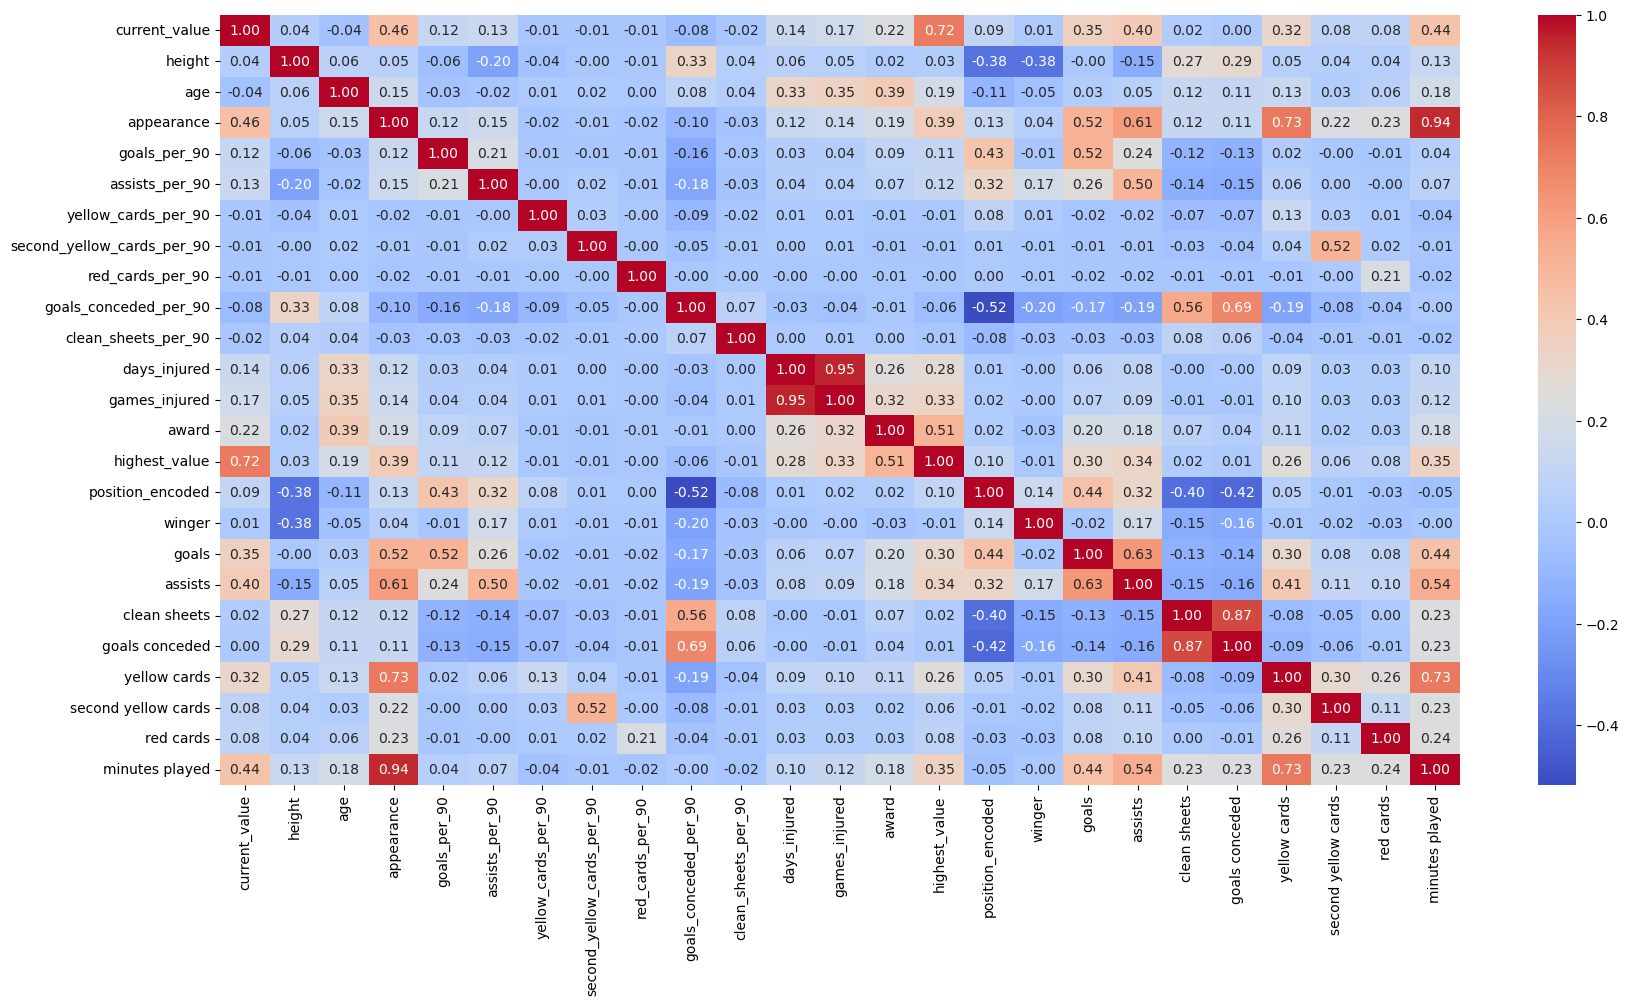

In [2046]:
df_corr = df_no_outliers.copy()
current_value = df_corr.pop('current_value')
df_corr.insert(0, 'current_value', current_value)

corr_matrix = df_corr.drop(['minutes_played_per_90'], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

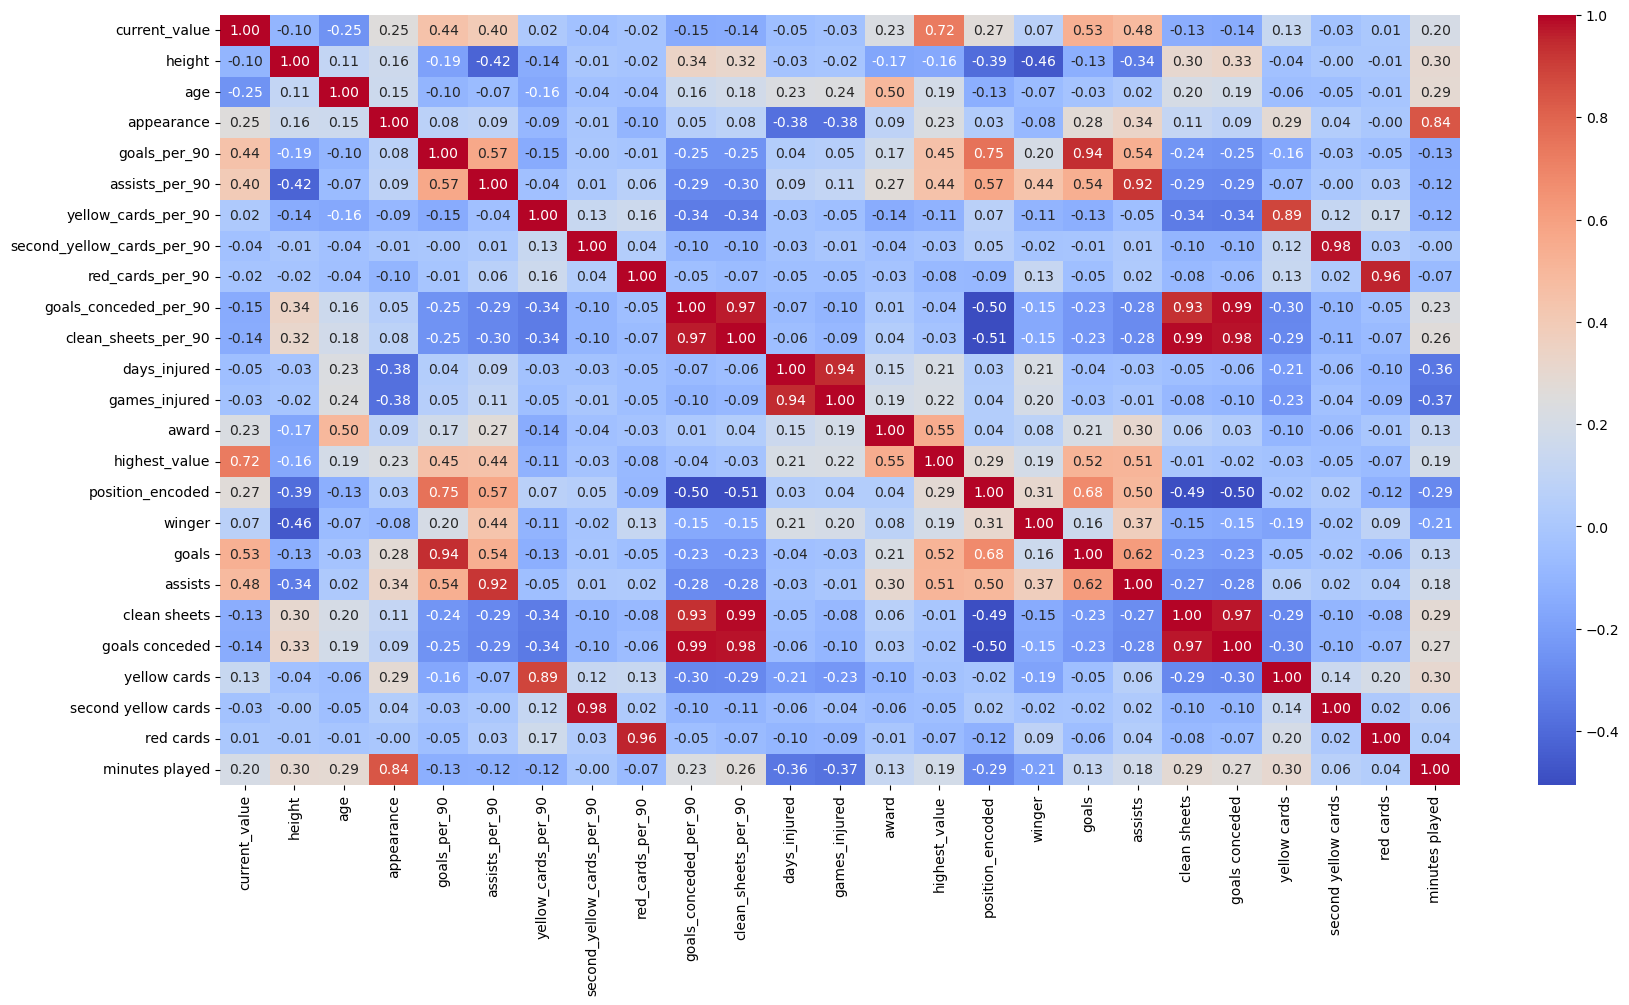

In [2047]:
df_corr = df_outliers.copy()
current_value = df_corr.pop('current_value')
df_corr.insert(0, 'current_value', current_value)

corr_matrix = df_corr.drop(['minutes_played_per_90'], axis=1).corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

We can see that the per90 columns are highly correlated with the actual columns. So we will choose to move forward with the actual columns.

In [2048]:
df_outliers = df_outliers.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90'], axis=1)
df_no_outliers = df_no_outliers.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90'], axis=1)

Now we will convert the positions to numerical values. To consider it in the correlation matrix.

In [2049]:
df_outliers = pd.get_dummies(df_outliers, columns=['position']).drop(['position_encoded'], axis=1)
df_no_outliers = pd.get_dummies(df_no_outliers, columns=['position']).drop(['position_encoded'], axis=1)
df_outliers.columns

Index(['team', 'name', 'height', 'age', 'appearance', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value', 'winger',
       'goals', 'assists', 'clean sheets', 'goals conceded', 'yellow cards',
       'second yellow cards', 'red cards', 'minutes played', 'position_Attack',
       'position_Defender', 'position_Goalkeeper', 'position_midfield'],
      dtype='object')

Now we will check the correlation again.

In [2050]:
correlation = df_outliers.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.724
goals                  0.534
assists                0.483
appearance             0.254
position_Attack        0.231
award                  0.227
minutes played         0.201
yellow cards           0.131
winger                 0.069
red cards              0.006
position_midfield     -0.010
games_injured         -0.030
second yellow cards   -0.032
days_injured          -0.051
height                -0.102
clean sheets          -0.135
goals conceded        -0.143
position_Goalkeeper   -0.145
position_Defender     -0.157
age                   -0.248
Name: current_value, dtype: float64


In [2051]:
correlation = df_no_outliers.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.724
appearance             0.460
minutes played         0.442
assists                0.400
goals                  0.354
yellow cards           0.316
award                  0.221
games_injured          0.167
days_injured           0.138
red cards              0.083
second yellow cards    0.079
position_Attack        0.050
height                 0.039
position_midfield      0.038
clean sheets           0.020
winger                 0.009
goals conceded         0.004
position_Defender     -0.015
age                   -0.043
position_Goalkeeper   -0.101
Name: current_value, dtype: float64


We will check the correlation matrix for the 4 positions datasets

In [2052]:
# We will drop the minutes played column because as we have seen above, it is highly correlated with appearance
df_gk = df_gk.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_def = df_def.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_mid = df_mid.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_fwd = df_fwd.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_gk_filtered = df_gk_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_def_filtered = df_def_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_mid_filtered = df_mid_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)
df_fwd_filtered = df_fwd_filtered.drop(['minutes_played_per_90', 'goals_per_90', 'assists_per_90', 'clean_sheets_per_90', 'goals_conceded_per_90', 'goals_conceded_per_90', 'yellow_cards_per_90', 'second_yellow_cards_per_90', 'red_cards_per_90', 'winger', 'minutes played'], axis=1)

In [2053]:
correlation_gk = df_gk.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.724
appearance             0.460
minutes played         0.442
assists                0.400
goals                  0.354
yellow cards           0.316
award                  0.221
games_injured          0.167
days_injured           0.138
red cards              0.083
second yellow cards    0.079
position_Attack        0.050
height                 0.039
position_midfield      0.038
clean sheets           0.020
winger                 0.009
goals conceded         0.004
position_Defender     -0.015
age                   -0.043
position_Goalkeeper   -0.101
Name: current_value, dtype: float64


In [2054]:
correlation = df_gk_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value         1.000
highest_value         0.715
clean sheets          0.516
appearance            0.510
goals conceded        0.454
yellow cards          0.314
award                 0.212
games_injured         0.154
days_injured          0.137
height                0.114
red cards             0.098
age                   0.054
second yellow cards   0.027
goals                 0.002
position_encoded        NaN
assists                 NaN
Name: current_value, dtype: float64


In [2055]:
correlation_def = df_def.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value         1.000
highest_value         0.715
clean sheets          0.516
appearance            0.510
goals conceded        0.454
yellow cards          0.314
award                 0.212
games_injured         0.154
days_injured          0.137
height                0.114
red cards             0.098
age                   0.054
second yellow cards   0.027
goals                 0.002
position_encoded        NaN
assists                 NaN
Name: current_value, dtype: float64


In [2056]:
correlation = df_def_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.727
appearance             0.452
goals                  0.337
yellow cards           0.336
assists                0.318
games_injured          0.148
award                  0.148
days_injured           0.121
height                 0.099
red cards              0.082
second yellow cards    0.082
age                   -0.075
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [2057]:
correlation_mid = df_mid.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.727
appearance             0.452
goals                  0.337
yellow cards           0.336
assists                0.318
games_injured          0.148
award                  0.148
days_injured           0.121
height                 0.099
red cards              0.082
second yellow cards    0.082
age                   -0.075
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [2058]:
correlation = df_mid_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.734
appearance             0.452
assists                0.405
goals                  0.372
yellow cards           0.333
award                  0.241
games_injured          0.152
height                 0.137
days_injured           0.124
second yellow cards    0.079
red cards              0.066
age                   -0.017
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [2059]:
correlation_fwd = df_fwd.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.734
appearance             0.452
assists                0.405
goals                  0.372
yellow cards           0.333
award                  0.241
games_injured          0.152
height                 0.137
days_injured           0.124
second yellow cards    0.079
red cards              0.066
age                   -0.017
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


In [2060]:
correlation = df_fwd_filtered.corr()
print(correlation['current_value'].sort_values(ascending=False))

current_value          1.000
highest_value          0.707
assists                0.460
goals                  0.459
appearance             0.450
yellow cards           0.276
award                  0.246
games_injured          0.189
days_injured           0.155
red cards              0.094
second yellow cards    0.068
height                 0.055
age                   -0.030
position_encoded         NaN
clean sheets             NaN
goals conceded           NaN
Name: current_value, dtype: float64


We can see from the above how different factors affect the value of a player in different positions. And how filtering the data does not affect the correlation between the columns. So will start with the model building process for the positions dataframes.

## Feature Selection:

We will choose the features based on the threshold of 0.3.

In [2061]:
threshold = 0.1

selected_features_gk = correlation_gk.index[abs(correlation_gk['current_value']) > threshold]
selected_features_def = correlation_def.index[abs(correlation_def['current_value']) > threshold]
selected_features_mid = correlation_mid.index[abs(correlation_mid['current_value']) > threshold]
selected_features_fwd = correlation_fwd.index[abs(correlation_fwd['current_value']) > threshold]

selected_features_gk, selected_features_def, selected_features_mid, selected_features_fwd

(Index(['height', 'appearance', 'award', 'current_value', 'highest_value',
        'clean sheets', 'goals conceded', 'yellow cards'],
       dtype='object'),
 Index(['appearance', 'days_injured', 'games_injured', 'award', 'current_value',
        'highest_value', 'goals', 'assists', 'yellow cards'],
       dtype='object'),
 Index(['height', 'appearance', 'games_injured', 'award', 'current_value',
        'highest_value', 'goals', 'assists', 'yellow cards'],
       dtype='object'),
 Index(['appearance', 'days_injured', 'games_injured', 'award', 'current_value',
        'highest_value', 'goals', 'assists', 'yellow cards'],
       dtype='object'))

In [2062]:
df_gk = df_gk[selected_features_gk]
df_def = df_def[selected_features_def]
df_mid = df_mid[selected_features_mid]
df_fwd = df_fwd[selected_features_fwd]

## Model Building:

In [2112]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2064]:
# Preparing the data for the model
X_gk = df_gk.drop(['current_value'], axis=1)
y_gk = df_gk['current_value']

X_def = df_def.drop(['current_value'], axis=1)
y_def = df_def['current_value']

X_mid = df_mid.drop(['current_value'], axis=1)
y_mid = df_mid['current_value']

X_fwd = df_fwd.drop(['current_value'], axis=1)
y_fwd = df_fwd['current_value']

#Splitting the data into training and testing sets
X_train_gk, X_test_gk, y_train_gk, y_test_gk = train_test_split(X_gk, y_gk, test_size=0.2, random_state=42)
X_train_def, X_test_def, y_train_def, y_test_def = train_test_split(X_def, y_def, test_size=0.2, random_state=42)
X_train_mid, X_test_mid, y_train_mid, y_test_mid = train_test_split(X_mid, y_mid, test_size=0.2, random_state=42)
X_train_fwd, X_test_fwd, y_train_fwd, y_test_fwd = train_test_split(X_fwd, y_fwd, test_size=0.2, random_state=42)

# Standardizing the data
scaler_gk = StandardScaler()
scaler_def = StandardScaler()
scaler_mid = StandardScaler()
scaler_fwd = StandardScaler()

scaler_gk.fit(X_train_gk)
scaler_def.fit(X_train_def)
scaler_mid.fit(X_train_mid)
scaler_fwd.fit(X_train_fwd)

X_train_gk_scaled = scaler_gk.transform(X_train_gk)
X_test_gk_scaled = scaler_gk.transform(X_test_gk)

X_train_def_scaled = scaler_def.transform(X_train_def)
X_test_def_scaled = scaler_def.transform(X_test_def)

X_train_mid_scaled = scaler_mid.transform(X_train_mid)
X_test_mid_scaled = scaler_mid.transform(X_test_mid)

X_train_fwd_scaled = scaler_fwd.transform(X_train_fwd)
X_test_fwd_scaled = scaler_fwd.transform(X_test_fwd)


In [2065]:
model_gk = LinearRegression()
model_def = LinearRegression()
model_mid = LinearRegression()
model_fwd = LinearRegression()

In [2115]:
ridge_model_gk = Ridge()
ridge_model_def = Ridge()
ridge_model_mid = Ridge()
ridge_model_fwd = Ridge()

In [2116]:
lasso_model_gk = Lasso()
lasso_model_def = Lasso()
lasso_model_mid = Lasso()
lasso_model_fwd = Lasso()

In [2247]:
param_grid_gk = {
    'alpha': [7, 8, 9 , 10, 11]  
}
grid_search_gk = GridSearchCV(estimator=ridge_model_gk,
                           param_grid=param_grid_gk,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

grid_search_lasso_gk = GridSearchCV(estimator=lasso_model_gk,
                           param_grid=param_grid_gk,
                           cv=5,
                           scoring='neg_mean_squared_error', 
                           verbose=1)

param_grid_def = {
    'alpha': [19, 20, 21] 
}
grid_search_def = GridSearchCV(estimator=ridge_model_def,
                            param_grid=param_grid_def,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

grid_search_lasso_def = GridSearchCV(estimator=lasso_model_def,
                            param_grid=param_grid_def,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

param_grid_mid = {
    'alpha':[4, 5, 6, 9]  
}
grid_search_mid = GridSearchCV(estimator=ridge_model_mid,
                            param_grid=param_grid_mid,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

grid_search_lasso_mid = GridSearchCV(estimator=lasso_model_mid,
                            param_grid=param_grid_mid,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

param_grid_fwd = {
    'alpha': [29, 30, 31, 32, 33]  
}
grid_search_fwd = GridSearchCV(estimator=ridge_model_fwd,
                            param_grid=param_grid_fwd,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)

grid_search_lasso_fwd = GridSearchCV(estimator=lasso_model_fwd,
                            param_grid=param_grid_fwd,
                            cv=5,
                            scoring='neg_mean_squared_error', 
                            verbose=1)


## Model Training:

In [2248]:
model_gk.fit(X_train_gk_scaled, y_train_gk)
model_def.fit(X_train_def_scaled, y_train_def)
model_mid.fit(X_train_mid_scaled, y_train_mid)
model_fwd.fit(X_train_fwd_scaled, y_train_fwd)

LinearRegression()

In [2249]:
ridge_model_gk.fit(X_train_gk_scaled, y_train_gk)
ridge_model_def.fit(X_train_def_scaled, y_train_def)
ridge_model_mid.fit(X_train_mid_scaled, y_train_mid)
ridge_model_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Ridge()

In [2250]:
lasso_model_gk.fit(X_train_gk_scaled, y_train_gk)
lasso_model_def.fit(X_train_def_scaled, y_train_def)
lasso_model_mid.fit(X_train_mid_scaled, y_train_mid)
lasso_model_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Lasso()

In [2251]:
grid_search_gk.fit(X_train_gk_scaled, y_train_gk)
grid_search_def.fit(X_train_def_scaled, y_train_def)
grid_search_mid.fit(X_train_mid_scaled, y_train_mid)
grid_search_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [29, 30, 31, 32, 33]},
             scoring='neg_mean_squared_error', verbose=1)

In [2252]:
grid_search_lasso_gk.fit(X_train_gk_scaled, y_train_gk)
grid_search_lasso_def.fit(X_train_def_scaled, y_train_def)
grid_search_lasso_mid.fit(X_train_mid_scaled, y_train_mid)
grid_search_lasso_fwd.fit(X_train_fwd_scaled, y_train_fwd)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [29, 30, 31, 32, 33]},
             scoring='neg_mean_squared_error', verbose=1)

## Model Testing:

In [2253]:
# ridge
y_pred_gk = grid_search_gk.predict(X_test_gk_scaled)
y_pred_def = grid_search_def.predict(X_test_def_scaled)
y_pred_mid = grid_search_mid.predict(X_test_mid_scaled)
y_pred_fwd = grid_search_fwd.predict(X_test_fwd_scaled)

In [2254]:
# lasso
y_pred_gk_lasso = grid_search_lasso_gk.predict(X_test_gk_scaled)
y_pred_def_lasso = grid_search_lasso_def.predict(X_test_def_scaled)
y_pred_mid_lasso = grid_search_lasso_mid.predict(X_test_mid_scaled)
y_pred_fwd_lasso = grid_search_lasso_fwd.predict(X_test_fwd_scaled)

In [2255]:
# best parameters
print("Best parameters found for Goalkeepers: ", grid_search_gk.best_params_)
print("Best parameters found for Defenders: ", grid_search_def.best_params_)
print("Best parameters found for Midfielders: ", grid_search_mid.best_params_)
print("Best parameters found for Forwards: ", grid_search_fwd.best_params_)

# best ridge
best_ridge_gk = grid_search_gk.best_estimator_
best_ridge_def = grid_search_def.best_estimator_
best_ridge_mid = grid_search_mid.best_estimator_
best_ridge_fwd = grid_search_fwd.best_estimator_

Best parameters found for Goalkeepers:  {'alpha': 9}
Best parameters found for Defenders:  {'alpha': 20}
Best parameters found for Midfielders:  {'alpha': 5}
Best parameters found for Forwards:  {'alpha': 30}


In [2256]:
coefficients_gk = pd.DataFrame(model_gk.coef_, X_gk.columns ,columns=['Coefficient'])
coefficients_gk

,Coefficient
height,100365.447
appearance,988786.203
award,-848886.414
highest_value,4324468.176
clean sheets,254822.661
goals conceded,-878503.140
yellow cards,200516.309


In [2257]:
coefficients_def = pd.DataFrame(model_def.coef_, X_def.columns ,columns=['Coefficient'])
coefficients_def

,Coefficient
appearance,633931.190
days_injured,948137.532
games_injured,-1726255.510
award,-1121847.937
highest_value,6982093.686
goals,471492.773
assists,168505.376
yellow cards,-391524.059


In [2258]:
coefficients_mid = pd.DataFrame(model_mid.coef_, X_mid.columns ,columns=['Coefficient'])
coefficients_mid

,Coefficient
height,99216.186
appearance,-290481.215
games_injured,-827334.260
award,-1607784.802
highest_value,8251639.573
goals,694496.526
assists,524546.952
yellow cards,523646.450


In [2259]:
coefficients_fwd = pd.DataFrame(model_fwd.coef_, X_fwd.columns ,columns=['Coefficient'])
coefficients_fwd

,Coefficient
appearance,-1391535.263
days_injured,386903.228
games_injured,-1108476.060
award,-2690921.722
highest_value,10112656.159
goals,2103765.084
assists,1619805.350
yellow cards,96690.844


As we can see above the features seems to affect the value of a player in different positions. We should evaluate the models based on the features we have selected so we can ensure that the insights we got are useful.

In [2260]:
print(model_gk.intercept_)
print(model_def.intercept_)
print(model_mid.intercept_)
print(model_fwd.intercept_)

1686658.1892166839
3254110.5598866055
3855341.276252019
4508143.041792331


## Model evaluation:

First we will evaluate the mean model to compare the models with it.

In [2261]:
mean_train_gk = [y_train_gk.mean()] * len(y_test_gk)
mean_train_def = [y_train_def.mean() ] * len(y_test_def)
mean_train_mid = [y_train_mid.mean()]  * len(y_test_mid)
mean_train_fwd = [y_train_fwd.mean()]  * len(y_test_fwd)

In [2262]:
mse_base_gk = mean_squared_error(y_test_gk, mean_train_gk )
print(f'Mean Squared Error of base model for Goalkeepers: {mse_base_gk}')

mse_base_def = mean_squared_error(y_test_def, mean_train_def )
print(f'Mean Squared Error of base model for Defenders: {mse_base_def}')

mse_base_mid = mean_squared_error(y_test_mid, mean_train_mid )
print(f'Mean Squared Error of base model for Midfielders: {mse_base_mid}')

mse_base_fwd = mean_squared_error(y_test_fwd, mean_train_fwd )
print(f'Mean Squared Error of base model for Forward: {mse_base_fwd}')

Mean Squared Error of base model for Goalkeepers: 21185555160495.543
Mean Squared Error of base model for Defenders: 55284353238486.98
Mean Squared Error of base model for Midfielders: 122714189436689.97
Mean Squared Error of base model for Forward: 83027325854895.62


### Mean Squared Error (MSE):

In [2263]:
mse_train_gk = mean_squared_error(y_train_gk, model_gk.predict(X_train_gk_scaled))
mse_test_gk = mean_squared_error(y_test_gk, model_gk.predict(X_test_gk_scaled))
print(f'Mean Squared Error for training: {mse_train_gk}')
print(f'Mean Squared Error for testing: {mse_test_gk}')

Mean Squared Error for training: 5306138482933.836
Mean Squared Error for testing: 6832616563629.46


In [2264]:
mse_train_def = mean_squared_error(y_train_def, model_def.predict(X_train_def_scaled))
mse_test_def = mean_squared_error(y_test_def, model_def.predict(X_test_def_scaled))
print(f'Mean Squared Error for training: {mse_train_def}')
print(f'Mean Squared Error for testing: {mse_test_def}')

Mean Squared Error for training: 13783434233929.883
Mean Squared Error for testing: 14267379717900.29


In [2265]:
mse_train_mid = mean_squared_error(y_train_mid, model_mid.predict(X_train_mid_scaled))
mse_test_mid = mean_squared_error(y_test_mid, model_mid.predict(X_test_mid_scaled))
print(f'Mean Squared Error for training: {mse_train_mid}')
print(f'Mean Squared Error for testing: {mse_test_mid}')

Mean Squared Error for training: 20872745154905.824
Mean Squared Error for testing: 27320851126867.676


In [2266]:
mse_train_fwd = mean_squared_error(y_train_fwd, model_fwd.predict(X_train_fwd_scaled))
mse_test_fwd = mean_squared_error(y_test_fwd, model_fwd.predict(X_test_fwd_scaled))
print(f'Mean Squared Error for training: {mse_train_fwd}')
print(f'Mean Squared Error for testing: {mse_test_fwd}')

Mean Squared Error for training: 34519504727180.023
Mean Squared Error for testing: 23578970894278.605


### Mean Absolute Error (mae):

In [2267]:
mae_train_gk = mean_absolute_error(y_train_gk, model_gk.predict(X_train_gk_scaled))
mae_test_gk = mean_absolute_error(y_test_gk, model_gk.predict(X_test_gk_scaled))
print(f'Mean Absolute Error for training: {mae_train_gk}')
print(f'Mean Absolute Error for testing: {mae_test_gk}')

Mean Absolute Error for training: 1056401.222994261
Mean Absolute Error for testing: 1146216.1127736433


In [2268]:
mae_train_def = mean_absolute_error(y_train_def, model_def.predict(X_train_def_scaled))
mae_test_def = mean_absolute_error(y_test_def, model_def.predict(X_test_def_scaled))
print(f'Mean Absolute Error for training: {mae_train_def}')
print(f'Mean Absolute Error for testing: {mae_test_def}')

Mean Absolute Error for training: 1805541.1207096505
Mean Absolute Error for testing: 1819390.6410692765


In [2269]:
mae_train_mid = mean_absolute_error(y_train_mid, model_mid.predict(X_train_mid_scaled))
mae_test_mid = mean_absolute_error(y_test_mid, model_mid.predict(X_test_mid_scaled))
print(f'Mean Absolute Error for training: {mae_train_mid}')
print(f'Mean Absolute Error for testing: {mae_test_mid}')

Mean Absolute Error for training: 2218110.208781878
Mean Absolute Error for testing: 2478747.2447002414


In [2270]:
mae_train_fwd = mean_absolute_error(y_train_fwd, model_fwd.predict(X_train_fwd_scaled))
mae_test_fwd = mean_absolute_error(y_test_fwd, model_fwd.predict(X_test_fwd_scaled))
print(f'Mean Absolute Error for training: {mae_train_fwd}')
print(f'Mean Absolute Error for testing: {mae_test_fwd}')

Mean Absolute Error for training: 2677718.976882263
Mean Absolute Error for testing: 2425010.830474015


### R-squared:

In [2271]:
r2_train_gk = r2_score(y_train_gk, model_gk.predict(X_train_gk_scaled))
r2_test_gk = r2_score(y_test_gk, model_gk.predict(X_test_gk_scaled))
print(f'R2 Score for training: {r2_train_gk}')
print(f'R2 Score for testing: {r2_test_gk}')

R2 Score for training: 0.7783500823907576
R2 Score for testing: 0.6769977574503137


In [2272]:
r2_train_def = r2_score(y_train_def, model_def.predict(X_train_def_scaled))
r2_test_def = r2_score(y_test_def, model_def.predict(X_test_def_scaled))
print(f'R2 Score for training: {r2_train_def}')
print(f'R2 Score for testing: {r2_test_def}')

R2 Score for training: 0.7636119926985765
R2 Score for testing: 0.741702441402227


In [2273]:
r2_train_mid = r2_score(y_train_mid, model_mid.predict(X_train_mid_scaled))
r2_test_mid = r2_score(y_test_mid, model_mid.predict(X_test_mid_scaled))
print(f'R2 Score for training: {r2_train_mid}')
print(f'R2 Score for testing: {r2_test_mid}')

R2 Score for training: 0.7545653521734785
R2 Score for testing: 0.775464289167036


In [2274]:
r2_train_fwd = r2_score(y_train_fwd, model_fwd.predict(X_train_fwd_scaled))
r2_test_fwd = r2_score(y_test_fwd, model_fwd.predict(X_test_fwd_scaled))
print(f'R2 Score for training: {r2_train_fwd}')
print(f'R2 Score for testing: {r2_test_fwd}')

R2 Score for training: 0.7458182815337748
R2 Score for testing: 0.7147763760264515
